# **Recomendação de vendas de jogos digitais** 🎮 

José Henrique de Oliveira<br>
[Portfólio](https://joseportfolio.notion.site/Portf-lio-do-Z-308350bb4f4544adb87da2a1a83b8f78) | [LinkedIn](https://www.linkedin.com/in/jholiveira94/)

---

# **Introdução**

A indústria de jogos digitais entrega grande volume de produções todos os anos e, como qualquer outro setor, necessita que seus produtos **desempenhem bem no mercado**.<br>
Portanto, **determinar quais nichos de jogos e clientes** trarão tal resultado é essencial para a continuidade dos projetos de uma empresa desse ramo.

Com esse contexto em mente, durante este estudo serão analisadas as vendas de jogos digitais com objetivo de encontrar padrões que auxiliem nessa tomada de decisão tão impactante.<br>
O conjunto de dados escolhido para conduzir essa investigação pode ser encontrado na plataforma Kaggle: [**Video Game Sales**](https://www.kaggle.com/datasets/gregorut/videogamesales/data)

Esse estudo terá como base a metodologia proposta no **CRISP-DM**:
1. Entendendo o negócio
2. Entendendo os dados
3. Preparação dos dados
4. Modelgem
5. Validação
6. Conclusões do estudo

### **Problemas de negócio**

Ao longo desse trabalho, será construído um **modelo de recomendação de lançamento de jogos por região** baseado nos padrões de vendas observados nos dados.<br>
Para tal, serão respondidas questões mais objetivas que auxiliarão a destrinchar o tema elencado.<br>
As perguntas estão agrupadas para facilitar a organização geral do estudo.

##### **Objetivo**

<div style="background-color: #6a0dad; color: white; padding: 10px; border-radius: 5px;">
<b>Recomendação de gêneros populares por região</b> <br>
Quais gêneros de jogos devem ser lançados em uma região específica para maximizar as vendas?
</div>

##### **Questões norteadoras**
Impacto do gênero nas vendas:
- Quais gêneros de jogos têm o maior sucesso em termos de vendas globais?
- Qual região (América do Norte, Europa, Japão, Outras) é mais forte em termos de vendas para diferentes gêneros?
- Existem padrões regionais nas preferências de gêneros de jogos?

Tendências temporais de lançamento e venda:
- Como as vendas de jogos mudaram ao longo do tempo?
- Existe uma correlação entre o ano de lançamento e o sucesso de vendas em diferentes regiões?

Impacto da publisher nas vendas:
- Quais publishers tendem a ter jogos com maiores vendas globais e por região?
- Quais publishers têm mais lançamentos por gênero?
- Existe diferença significativa nas vendas entre publishers para jogos do mesmo gênero?

---

# **1. Preparações**

### **1.1 Bibliotecas e programações iniciais**

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Filtro de avisos.
import warnings
warnings.filterwarnings('ignore')

'''
Para uma melhor harmonia das visualizações futuras, será definida uma paleta de cores
'''

cores = ["#E8D4F2", "#D8AEE4", "#C56FD9", "#A73ECF", "#8F1EC3", "#7A0AB4", "#6B09A1", "#6a0dad", "#5C0C99", "#4E0B88",  "#420977",  "#3A0566"]
sns.set_palette(cores)
sns.color_palette()

[(0.9098039215686274, 0.8313725490196079, 0.9490196078431372),
 (0.8470588235294118, 0.6823529411764706, 0.8941176470588236),
 (0.7725490196078432, 0.43529411764705883, 0.8509803921568627),
 (0.6549019607843137, 0.24313725490196078, 0.8117647058823529),
 (0.5607843137254902, 0.11764705882352941, 0.7647058823529411),
 (0.47843137254901963, 0.0392156862745098, 0.7058823529411765),
 (0.4196078431372549, 0.03529411764705882, 0.6313725490196078),
 (0.41568627450980394, 0.050980392156862744, 0.6784313725490196),
 (0.3607843137254902, 0.047058823529411764, 0.6),
 (0.3058823529411765, 0.043137254901960784, 0.5333333333333333),
 (0.25882352941176473, 0.03529411764705882, 0.4666666666666667),
 (0.22745098039215686, 0.0196078431372549, 0.4)]

In [3]:
''' 
Função para gráfico de barras horizontais análise de variável categórica.
'''

def grafico_barra(data_frame, coluna_y, d, axs):

    ''' 
    data_frame: DataFrame que contém os dados que serão plotados;
    coluna_y: Coluna do DataFrame que comporá o eixo das ordenadas, entre aspas;
    d: distância para valor de cada barra;
    axs: posição na figura construída com plt.subplots().
    '''

    ax = sns.barplot(data = data_frame,  
                    x = data_frame[coluna_y], 
                    y = data_frame.index, 
                    hue = data_frame[coluna_y],
                    palette = cores,
                    legend = False,
                    ax = axs)

    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.yaxis.set_tick_params(labelsize = 12, labelcolor = '#3A0566')
    ax.set_xticklabels([])

    for i, vendas in enumerate(data_frame[coluna_y]):
        qtd = f'{vendas:,.0f}'.replace(',','')  
        ax.text(vendas+d, i, qtd, color = '#3A0566', fontsize=10, weight='bold', ha='right', va='center')

    sns.despine(left = True, bottom = True)

    return ax

In [4]:
''' 
Função para boxplot análise de variável categórica.
'''

def boxplot_unico(data_frame, coluna_y, axs):

    ''' 
    data_frame: DataFrame que contém os dados que serão plotados;
    coluna_y: Coluna do DataFrame que comporá o eixo das ordenadas, entre aspas;
    axs: posição na figura construída com plt.subplots().
    '''

    ax = sns.boxplot(data = data_frame,  
                    palette = ["#C56FD9"],
                    legend = False,
                    fill = True,
                    linecolor = "#3A0566",
                    ax = axs)

    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.yaxis.set_tick_params(labelsize = 12, labelcolor = '#3A0566')
    ax.set_xticklabels([])

    sns.despine(left = True, bottom = True)

    return ax

In [5]:
''' 
Função para plotagem de histograma, com linha KDE, para análise de variável numérica.
'''

def histplot_unico(data_frame, axs):

    ''' 
    data_frame: DataFrame que contém os dados que serão plotados;
    axs: posição na figura construída com plt.subplots()
    '''

    ax = sns.histplot(data = data_frame,              
                kde = True,
                color = "#8F1EC3",
                legend = False,
                ax = axs
                )
    # Controle da cor da linha KDE
    for line in ax.lines:
        line.set_color("#4E0B88")

    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.yaxis.set_tick_params(labelsize = 12, labelcolor = '#3A0566')
    ax.xaxis.set_tick_params(labelsize = 12, labelcolor = '#3A0566')

    sns.despine(left = True, bottom = False)

    return ax

In [6]:
''' 
Função para gráfico de linha
'''

def grafico_linha(data_frame, bool, axs):

    ''' 
    data_frame: DataFrame que contém os dados que serão plotados;
    bool: True ou False para acionar ou não a legenda;
    axs: posição na figura construída com plt.subplots().
    '''

    ax = sns.lineplot(data = data_frame,
                    palette = ["#5C0C99", "#6a0dad", "#5C0C99", "#D8AEE4"],
                    legend = bool,
                    ax = axs)

    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.yaxis.set_tick_params(labelsize = 12, labelcolor = '#3A0566')
    ax.xaxis.set_tick_params(labelsize = 12, labelcolor = '#3A0566')

    sns.despine(left = False, bottom = False)

    return ax

### **1.2 Carregando e conhecendo os dados**

In [7]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Nesse conjunto de dados, há os seguintes atributos:

- Rank - Classificação geral das vendas
- Name - Nome do jogo
- Platform - Platforma de lançamento do jogo (PC,PS4, etc.)
- Year - Ano de lançamento do jogo
- Genre - Gênero do jogo
- Publisher - Empresa responsável pela publicação do jogo
- NA_Sales - Vendas na América do Norte (em milhões)
- EU_Sales - Vendas na Europa (em milhões)
- JP_Sales - Vendas no Japão (em milhões)
- Other_Sales - Vendas em outras regiões (em milhões)
- Global_Sales - Total mundial de vendas

Considerando que este estudo está em português, algumas expressões serão traduzidas para melhor localização do estudo.<br>
Segue relação de tradução:

|   **Original**   |    **Tradução**    |
| :----------: | :------------: |
|     Rank     |       -        |
|     Name     |      Nome      |
|   Platform   |   Plataforma   |
|     Year     |      Ano       |
|    Genre     |     Genero     |
|  Publisher   |       -        |
|   NA_Sales   |   Vendas_AN    |
|   EU_Sales   |   Vendas_EU    |
|   JP_Sales   |   Vendas_JP    |
| Other_Sales  | Vendas_Outras  |
| Global_Sales | Vendas_Globais |

As expressões **Rank** e **Platform** não receberão tradução pelo uso comum da comunidade de jogos, mesmo no Brasil.

### **1.3 Adequações iniciais**

In [8]:
'''
Considerando que as colunas Rank e Name trazem informações individualizadas de cada jogo e esse estudo focará em comportamentos agrupados,
essas colunas serão retiradas. As demais permanecerão.
'''

df = df.drop('Name', axis = 1)
df = df.drop('Rank', axis = 1)

In [9]:
''' 
Como colocado na Contextualização, as colunas serão traduzidas.
'''

df.columns = ['Plataforma', 'Ano', 'Genero', 'Publisher', 'Vendas_AN', 'Vendas_EU', 'Vendas_JP', 'Vendas_Outras', 'Vendas_Globais']

In [10]:
''' 
Verificando a tipagem das features e a existência de valores nulos
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Plataforma      16598 non-null  object 
 1   Ano             16327 non-null  float64
 2   Genero          16598 non-null  object 
 3   Publisher       16540 non-null  object 
 4   Vendas_AN       16598 non-null  float64
 5   Vendas_EU       16598 non-null  float64
 6   Vendas_JP       16598 non-null  float64
 7   Vendas_Outras   16598 non-null  float64
 8   Vendas_Globais  16598 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.1+ MB


<div style="background-color: #6a0dad; color: white; padding: 10px; border-radius: 5px;">
💡 Percepções
</div>

A partir dessas informações, conclui-se que:
- A tipagem da feature Ano pode ser adequada para int.
- Há valores nulos nas features Ano e Publisher. 
    - Já pode-se entender que é uma quantidade insignificante, portanto não atrapalhará o estudo.

In [11]:
''' 
Modificando a tipagem da coluna Ano.
Para isso, os valores NA serão preenchidos por zero.
'''

df['Ano'] = df.Ano.fillna(0)

df['Ano'] = df['Ano'].astype(int)

In [12]:
''' 
Verificando as alterações
'''

df['Ano'].info()
print('')
df.head(3)

<class 'pandas.core.series.Series'>
RangeIndex: 16598 entries, 0 to 16597
Series name: Ano
Non-Null Count  Dtype
--------------  -----
16598 non-null  int32
dtypes: int32(1)
memory usage: 65.0 KB



,Plataforma,Ano,Genero,Publisher,Vendas_AN,Vendas_EU,Vendas_JP,Vendas_Outras,Vendas_Globais
0,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [13]:
''' 
Verificação das plataformas, gêneros e publishers apresentadas nesse conjunto de dados
'''

for c in df[['Plataforma', 'Genero', 'Publisher']]:
    if c in df[['Plataforma', 'Genero']]:
        print(f'A quantidade de valores únicos de {c} é:', df[c].nunique(), '\n')
        print(f'Os valores únicos de {c} são:\n', df[c].unique(), '\n')
        print('-'*85)
    else:
        print(f'A quantidade de valores únicos de {c} é:', df[c].nunique())
        print(f'Em função da quantidade, optou-se por suprimir a lista de valores únicos de {c}.')

A quantidade de valores únicos de Plataforma é: 31 

Os valores únicos de Plataforma são:
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 

-------------------------------------------------------------------------------------
A quantidade de valores únicos de Genero é: 12 

Os valores únicos de Genero são:
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy'] 

-------------------------------------------------------------------------------------
A quantidade de valores únicos de Publisher é: 578
Em função da quantidade, optou-se por suprimir a lista de valores únicos de Publisher.


<div style="background-color: #6a0dad; color: white; padding: 10px; border-radius: 5px;">
💡 Percepções
</div>

A verificação de valores únicos auxilia para compreender a diversidade das informações presentes no conjunto de dados.<br>
Por exemplo, fica nítido que uma análise individualizada por Plataforma, Gênero ou Publisher é inviável se não houver seleção ou agrupamento desses dados.

Por outro lado, fortalece as questões norteadoras quanto ao estudo de comportamentos generalizados e quanto a buscar valores com maior impacto.

In [14]:
''' 
Verificação geral de estatísticas descritivas do Dataset
'''

df.describe().round(2)

,Ano,Vendas_AN,Vendas_EU,Vendas_JP,Vendas_Outras,Vendas_Globais
count,16598.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,1973.65,0.26,0.15,0.08,0.05,0.54
std,254.35,0.82,0.51,0.31,0.19,1.56
min,0.00,0.00,0.00,0.00,0.00,0.01
25%,2003.00,0.00,0.00,0.00,0.00,0.06
50%,2007.00,0.08,0.02,0.00,0.01,0.17
75%,2010.00,0.24,0.11,0.04,0.04,0.47
max,2020.00,41.49,29.02,10.22,10.57,82.74


<div style="background-color: #6a0dad; color: white; padding: 10px; border-radius: 5px;">
💡 Percepções
</div>

Considerando que as vendas estão na casa dos milhões, como descrito no **1.2 Carregando e conhecendo os dados**, percebe-se com essa análise que a maioria dos jogos não atinge quantidade expressiva de vendas.

Apenas a partir do terceiro quartil encontram-se jogos com ao menos um milhão de cópias vendidas, mesmo olhando para Vendas_Globais, que é a soma das regiões.

### **1.4 Considerações iniciais**

A partir das verificações feitas nesse tópico, constata-se que:
- As questões norteadoras previamente elencadas são coerentes para esse conjunto de dados.
- Analisar comportamentos a partir de agrupamentos, como por região ou gênero, será importante para que dados menos expressivos tenham mais espaço no estudo.
    - Assim como possibilitará destacar informações relevantes em dados esparsos como das Publishers.


---

# **2. EDA - Análise Exploratória dos Dados**

Nessa etapa, serão aprofundadas as etapas 2 (Entendendo os dados) e 3 (Preparação dos dados) do CRISP-DM.<br>
Para isso, serão realizadas análises univariadas e bivariadas das features presentes no conjunto de dados.

In [15]:
''' 
Retomando o DataFrame após adequações
'''

df.head()

,Plataforma,Ano,Genero,Publisher,Vendas_AN,Vendas_EU,Vendas_JP,Vendas_Outras,Vendas_Globais
0,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### **2.1 Análise univariada das features**

Essa seção será dedicada à análise das variáveis individualmente para aprofundamento do conhecimento sobre o conjunto de dados.<br>
Considerando o número de colunas, será possível estudar todo o conjunto.

Primeiramente serão analisadas as variáveis categóricas, seguidas das numéricas.

#### **Variáveis categóricas**

Nesse momento, as variáveis estudadas serão: Plataforma, Genero e Publisher.

In [16]:
''' 
Organização dos dados para geração dos gráficos
'''

# Plataformas
todas_plataformas = pd.DataFrame(df['Plataforma'].value_counts().sort_values(ascending = False))
todas_plataformas.reset_index(inplace= True)
top10_plataforma = pd.DataFrame(df['Plataforma'].value_counts().sort_values(ascending = False).head(10))

# Gênero
todos_generos = pd.DataFrame(df['Genero'].value_counts().sort_values(ascending = False))
todos_generos.reset_index(inplace= True)
todos_generos2 = pd.DataFrame(df['Genero'].value_counts().sort_values(ascending = False))

# Publisher
todas_publisher = pd.DataFrame(df['Publisher'].value_counts().sort_values(ascending = False))
todas_publisher.reset_index(inplace= True)
top10_publisher = pd.DataFrame(df['Publisher'].value_counts().sort_values(ascending = False).head(10))

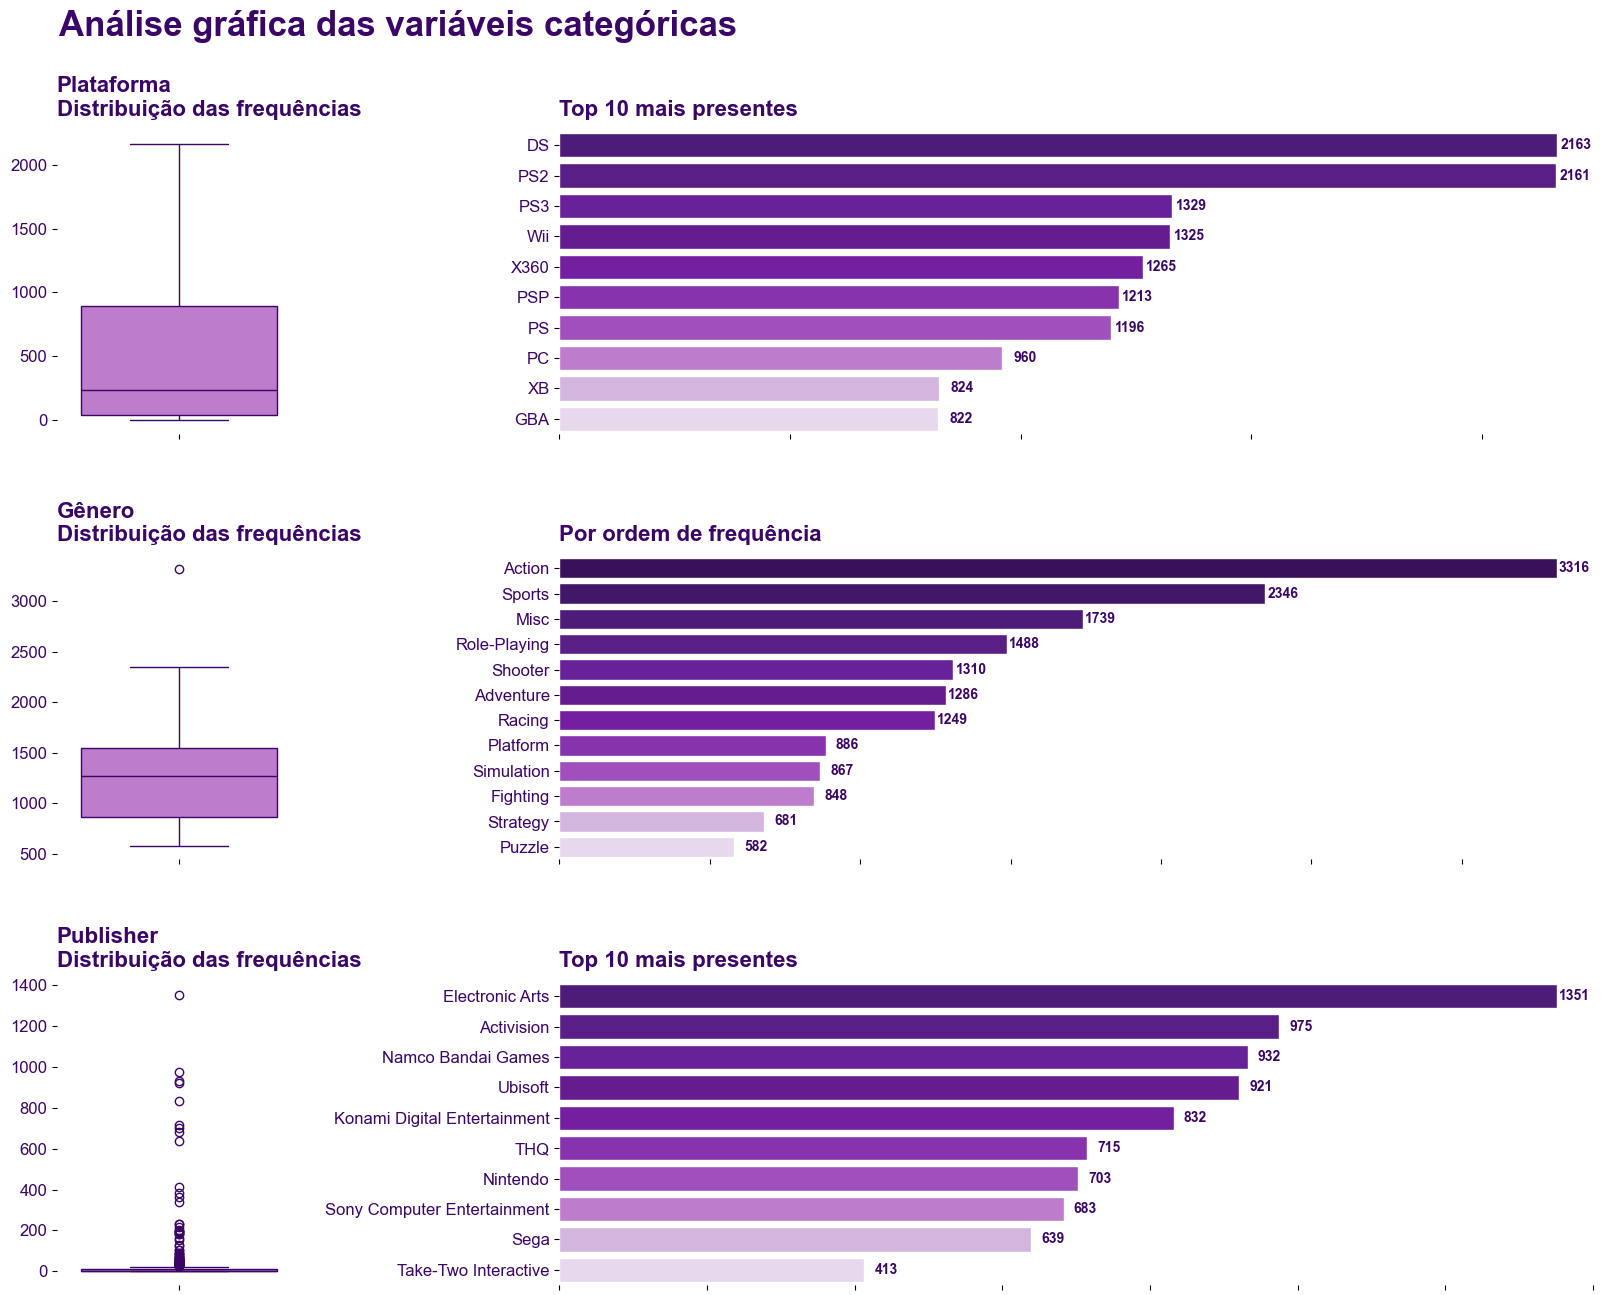

In [17]:
''' 
Construção gráfica para análise das variáveis categóricas
Cada gráfico foi gerado a partir das funções definidas na seção 1. Preparações
'''

fig, axs = plt.subplots(3,2, figsize = (20, 15), gridspec_kw={'width_ratios': [0.7, 3]})
fig.suptitle('Análise gráfica das variáveis categóricas', fontsize = 25, ha = 'left', weight='bold', color = '#3A0566', y = 0.96, x = 0.126)

sns.set_theme(style = "white")

ax1 = boxplot_unico(todas_plataformas, 'count', axs[0,0])
ax1.set_title('Plataforma\nDistribuição das frequências', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax2 = grafico_barra(top10_plataforma, 'count', 75, axs[0,1])
ax2.set_title('\nTop 10 mais presentes', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax3 = boxplot_unico(todos_generos, 'count', axs[1,0])
ax3.set_title('Gênero\nDistribuição das frequências', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax4 = grafico_barra(todos_generos2, 'count', 110, axs[1,1])
ax4.set_title('\nPor ordem de frequência ', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax5 = boxplot_unico(todas_publisher, 'count', axs[2,0])
ax5.set_title('Publisher\nDistribuição das frequências', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax6 = grafico_barra(top10_publisher, 'count', 45, axs[2,1])
ax6.set_title('\nTop 10 mais presentes', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

<div style="background-color: #6a0dad; color: white; padding: 10px; border-radius: 5px;">
💡 Percepções
</div>

**Quanto às plataformas**
- A distribuição das plataformas está notavelmente desbalanceada, porém é um resultado esperado, visto que com a popularização dos vídeo games ao longo do tempo, poucas empresam mantiveram plataformas ativas.
    - Observando o gráfico de barras, as plataformas presentes no Top 10 pertencem, com exceção da plataforma PC, a apenas três empresas: Nintendo, Sony e Microsoft.
- O estudo comparativo das plataformas e com o ano deverá auxiliar a compreender essa distribuição.
- Vale ressaltar que o Dataset estudado não apresenta todas as vendas de todos os jogos presentes em cada plataforma, o que é um estudo interessante e importante para as empresas. 

**Quanto aos gêneros**
- A distribuição dos gêneros também está desbalanceada e apresenta um resultado esperado, visto que os gêneros mais frequentes possuem uma gama maior de variedades, enquanto que os outros são mais nichados.
- O possível outlier indicado no boxplot pode ser ignorado, visto que Action possui muitos lançamentos comparado aos demais gêneros.
- **Hipótese**: Os jogos de Platform, Simulation, Fighting, Strategy e Puzzle com frequência exigem bastante raciocínio e habilidade, como muitos jogadores buscam jogos por relaxamento, as empresas lançam menos títulos desses gêneros.
    - O Dataset não contempla informações para analisar essa hipótese. 

**Quanto às publishers**
- Como visto na seção **1.3 Adequações iniciais**, há 578 publishers nesse conjunto de dados e, como visto no gráfico de barras, mesmo entre o Top 10, há grande disparidade entre os valores, o que explica um boxplot ao mesmo tempo condensado na parte inferior e com diversas acusações de outliers.
- Fica nítido a necessidade de estudar essa variável de forma agrupa e selecionada, visto que diversos de seus valores são pouco expressivos.

#### **Variáveis numéricas**

Nesse momento, as variáveis estudadas serão: Ano, Vendas_AN, Vendas_EU, Vendas_JP, Vendas_Outras e Vendas_Globais

In [18]:
''' 
Retomando estatísticas descritivas básicas para planejamento da análise visual.
'''
df.describe().round(2)

,Ano,Vendas_AN,Vendas_EU,Vendas_JP,Vendas_Outras,Vendas_Globais
count,16598.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,1973.65,0.26,0.15,0.08,0.05,0.54
std,254.35,0.82,0.51,0.31,0.19,1.56
min,0.00,0.00,0.00,0.00,0.00,0.01
25%,2003.00,0.00,0.00,0.00,0.00,0.06
50%,2007.00,0.08,0.02,0.00,0.01,0.17
75%,2010.00,0.24,0.11,0.04,0.04,0.47
max,2020.00,41.49,29.02,10.22,10.57,82.74


In [19]:
''' 
Organização dos dados para geração dos gráficos.
'''

df_ano = df[['Ano']].query("Ano > 0")

df_vendas_AN_1 = df[['Vendas_AN']].query('0 <= Vendas_AN <= 1')
df_vendas_AN_2 = df[['Vendas_AN']].query('Vendas_AN > 1')

df_vendas_EU_1 = df[['Vendas_EU']].query('0 <= Vendas_EU <= 1')
df_vendas_EU_2 = df[['Vendas_EU']].query('Vendas_EU > 1')

df_vendas_JP_1 = df[['Vendas_JP']].query('0 <= Vendas_JP <= 1')
df_vendas_JP_2 = df[['Vendas_JP']].query('Vendas_JP > 1')

df_vendas_Outras_1 = df[['Vendas_Outras']].query('0 <= Vendas_Outras <= 1')
df_vendas_Outras_2 = df[['Vendas_Outras']].query('Vendas_Outras > 1')

df_vendas_Globais_1 = df[['Vendas_Globais']].query('0 <= Vendas_Globais <= 1')
df_vendas_Globais_2 = df[['Vendas_Globais']].query('Vendas_Globais > 1')


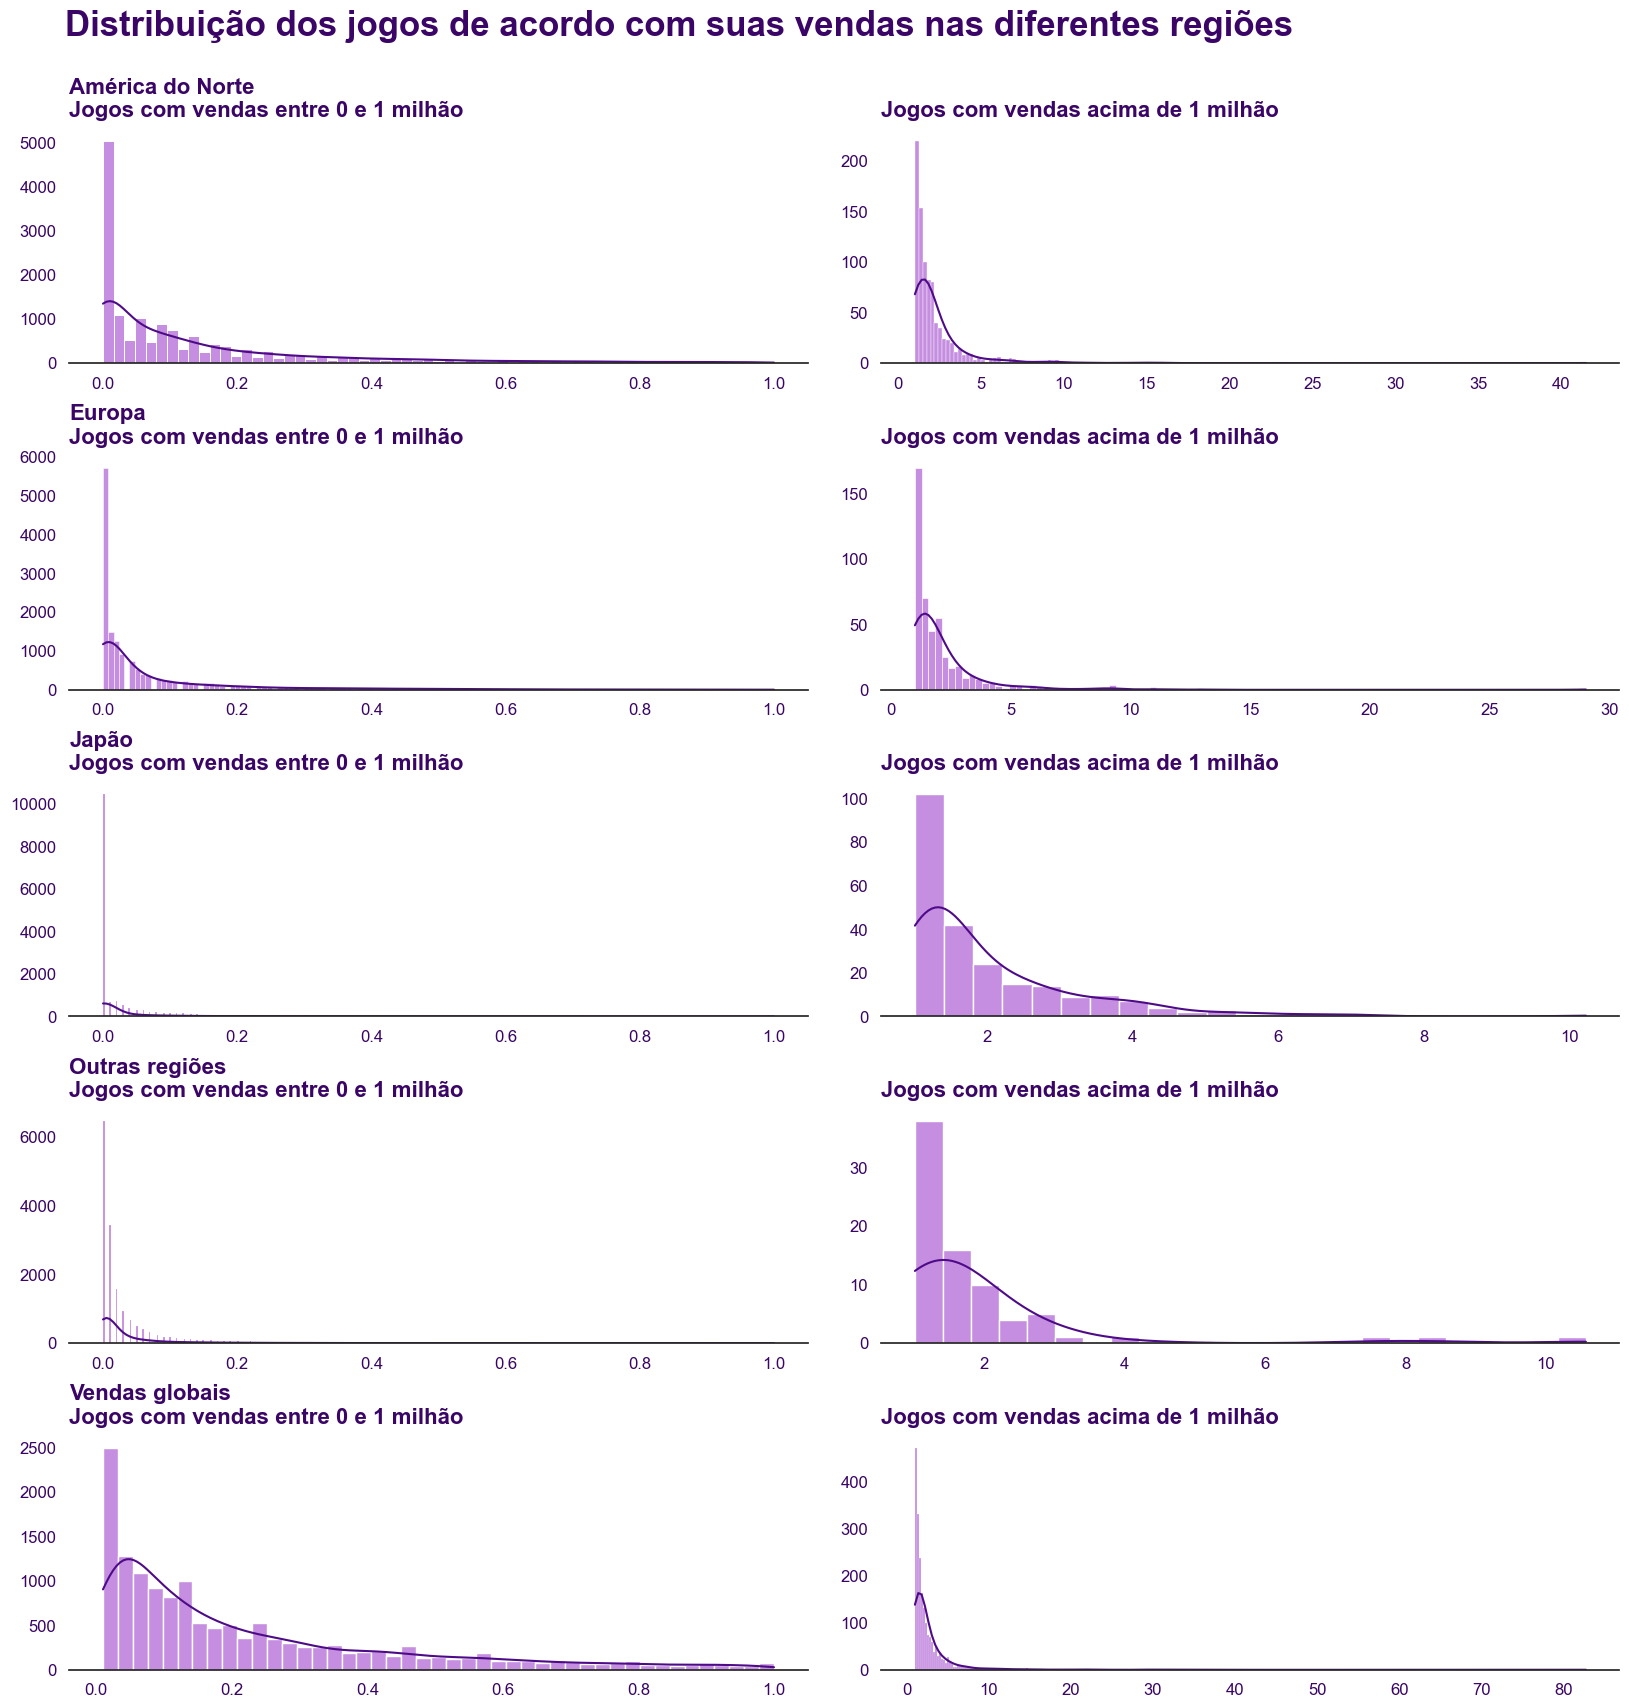

In [20]:
''' 
Construção gráfica para análise das variáveis numéricas
Cada gráfico foi gerado a partir das funções definidas na seção 1. Preparações
'''

fig, axs = plt.subplots(5,2, figsize = (20, 20))
fig.suptitle('Distribuição dos jogos de acordo com suas vendas nas diferentes regiões', fontsize = 25, ha = 'left', weight='bold', color = '#3A0566', y = 0.94, x = 0.123)

sns.set_theme(style = "white")

ax1 = histplot_unico(df_vendas_AN_1['Vendas_AN'], axs[0,0])
ax1.set_title('América do Norte\nJogos com vendas entre 0 e 1 milhão', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax1 = histplot_unico(df_vendas_AN_2['Vendas_AN'], axs[0,1])
ax1.set_title('\nJogos com vendas acima de 1 milhão', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax1 = histplot_unico(df_vendas_EU_1['Vendas_EU'], axs[1,0])
ax1.set_title('Europa\nJogos com vendas entre 0 e 1 milhão', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax1 = histplot_unico(df_vendas_EU_2['Vendas_EU'], axs[1,1])
ax1.set_title('\nJogos com vendas acima de 1 milhão', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax1 = histplot_unico(df_vendas_JP_1['Vendas_JP'], axs[2,0])
ax1.set_title('Japão\nJogos com vendas entre 0 e 1 milhão', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax1 = histplot_unico(df_vendas_JP_2['Vendas_JP'], axs[2,1])
ax1.set_title('\nJogos com vendas acima de 1 milhão', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax1 = histplot_unico(df_vendas_Outras_1['Vendas_Outras'], axs[3,0])
ax1.set_title('Outras regiões\nJogos com vendas entre 0 e 1 milhão', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax1 = histplot_unico(df_vendas_Outras_2['Vendas_Outras'], axs[3,1])
ax1.set_title('\nJogos com vendas acima de 1 milhão', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax1 = histplot_unico(df_vendas_Globais_1['Vendas_Globais'], axs[4,0])
ax1.set_title('Vendas globais\nJogos com vendas entre 0 e 1 milhão', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax1 = histplot_unico(df_vendas_Globais_2['Vendas_Globais'], axs[4,1])
ax1.set_title('\nJogos com vendas acima de 1 milhão', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

plt.subplots_adjust(wspace=0.1, hspace=0.4)
plt.show()

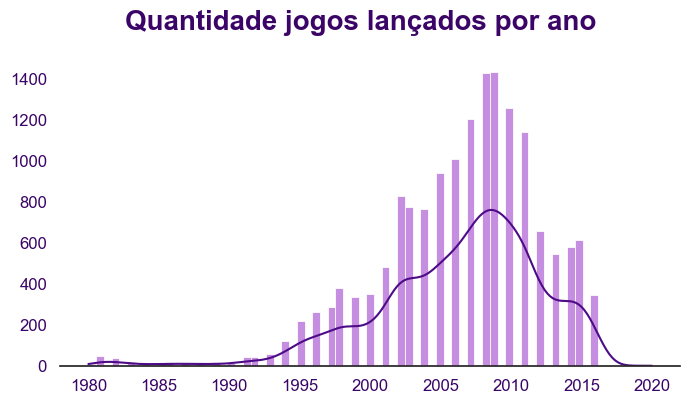

In [21]:
fig, ax = plt.subplots(figsize = (8, 4))
fig.suptitle('Quantidade jogos lançados por ano', fontsize = 20, ha = 'center', weight='bold', color = '#3A0566', y = 1)

sns.set_theme(style = "white")

ax1 = histplot_unico(df_ano['Ano'], ax)

plt.show()

<div style="background-color: #6a0dad; color: white; padding: 10px; border-radius: 5px;">
💡 Percepções
</div>

- Como já observado na seção **1.3 Adequações iniciais**, há grande discrepância na quantidade de cópias vendidas de cada jogo, isto é, como visto nos histogramas, a quantidade de jogos que vendou acima de um milhão de cópias é baixíssima.
    - Porém, há jogos com altíssima quantidade de vendas, como pode ser observado na tabela de estatísticas descritivas, mas por serem casos isolados, praticamente desaparecem nos histogramas. 
    - Segue abaixo tabela resumo dos maiores valores de venda em cada região, o valor mínimo não será mostrado visto que é zero em quase todas as regiões:

| Região           | Maior quantidade vendida (em milhões) |
| ---------------- | :-----------------------------------: |
| América do Norte |                 41.49                 |
| Europa           |                 29.02                 |
| Japão            |                 10.22                 |
| Outras regiões   |                 10.57                 |
| Vendas globais   |                 82.74                 |

- O estudo dessas variáveis separadamente reforça a necessidade de compará-las com as demais variáveis, em especial as categóricas, para melhor compreender o comportamento das vendas.
    - **Hipótese**: Ao analisar a quantidade vendida por gênero, a discrepância tenderá a ser menos acentuada, ainda que deva existir disparidade.
- É interessante destacar quanto as regiões comportam-se diferentemente. Em todas há muitos jogos que não alcançam 0.1 milhão de cópias vendidas, mas no Japão essa diferença é ainda mais demarcada.
- Essa análise levanta questões importantes: 
    > Quando um jogo é considerado bem sucedido em número de cópias vendidas?<br>
    > É justo dar tanto peso ao número de vendas de um jogo?<br>
    > Como empresas de diferentes portes lidam com as vendas de seus jogos?<br>

    - Para essas perguntas serão necessários dados que esse Dataset não possui, assim ficarão para estudos posteriores.

- Segundo esse Dataset, a década de 2000 concentra a maioria dos lançamentos.
    - A comparação com as plataformas será de grande valia, visto que há plataformas bem sucedidas nesse período, como o PS2.


### **2.2 Análise bivariada e multivariada das features**

##### **Análise do impacto do gênero nas vendas**
Nessa seção, serão observadas as performances de cada gênero quanto a quantidade de cópias vendidas nas diferentes regiões presentes no conjunto de dados.

In [22]:
''' 
Preparação dos dados: criação de um DataFrame das vendas por gênero e lista de mais vendidos globalmente
'''

df_vendas_genero = df.groupby('Genero')[['Vendas_AN', 'Vendas_EU', 'Vendas_JP', 'Vendas_Outras','Vendas_Globais']].sum()

lista_mais_vendidos_global = df_vendas_genero['Vendas_Globais'].sort_values(ascending = False).index

Primeiramente, será investigado se o ranking de vendas em cada região segue o mesmo padrão das vendas globais.

Globalmente, o ranking de vendas é:

| Posição |    Gênero    |
| :-----: | :----------: |
|    1    |    Action    |
|    2    |    Sports    |
|    3    |   Shooter    |
|    4    | Role-Playing |
|    5    |   Platform   |
|    6    |     Misc     |
|    7    |    Racing    |
|    8    |   Fighting   |
|    9    |  Simulation  |
|   10    |    Puzzle    |
|   11    |  Adventure   |
|   12    |   Strategy   |



In [23]:
''' 
Comparação com o ranking global
'''

mesmo_comportamento = []

for i in ['Vendas_AN', 'Vendas_EU', 'Vendas_JP', 'Vendas_Outras']:
    porcentagem_comportamento = 0
    lista_mais_vendidos = df_vendas_genero[i].sort_values(ascending = False).index

    for n in range(12):
        if lista_mais_vendidos[n] == lista_mais_vendidos_global[n]:
            porcentagem_comportamento += 1
    porcentagem = (porcentagem_comportamento/12)* 100
    mesmo_comportamento.append(round(porcentagem, 2))

df_comparacao_ranking = pd.DataFrame({'Regiao' : ['Vendas_AN', 'Vendas_EU', 'Vendas_JP', 'Vendas_Outras'],
                         'Comparacao_Global (%)': mesmo_comportamento})

print("Ao comparar o mercado de cada região com o global, tem-se, em porcentagem, o quanto comportam-se semelhantemente:")
df_comparacao_ranking

Ao comparar o mercado de cada região com o global, tem-se, em porcentagem, o quanto comportam-se semelhantemente:


,Regiao,Comparacao_Global (%)
0,Vendas_AN,66.67
1,Vendas_EU,33.33
2,Vendas_JP,0.00
3,Vendas_Outras,50.00


<div style="background-color: #6a0dad; color: white; padding: 10px; border-radius: 5px;">
💡 Percepções
</div>

- Com essa comparação, fica nítido que basear-se unicamente no comportamento global para tomar decisões pode acarretar em problemas de vendas dentro das áreas.
    - Porém, percebe-se o quanto o mercado Norte Americano influencia as vendas globais, visto que apresenta comportamento muito semelhante.
    - É importante destacar também que o mercado Japonês segue padrão de vendas muito diferente do mercado mundial.
        - Ainda assim não significa que o padrão mundial não tenha semelhanças com o mercado do Japão.
- Essa investigação reforça a necessidade de estudar a fundo cada região para melhor compreender seus aspectos individuais

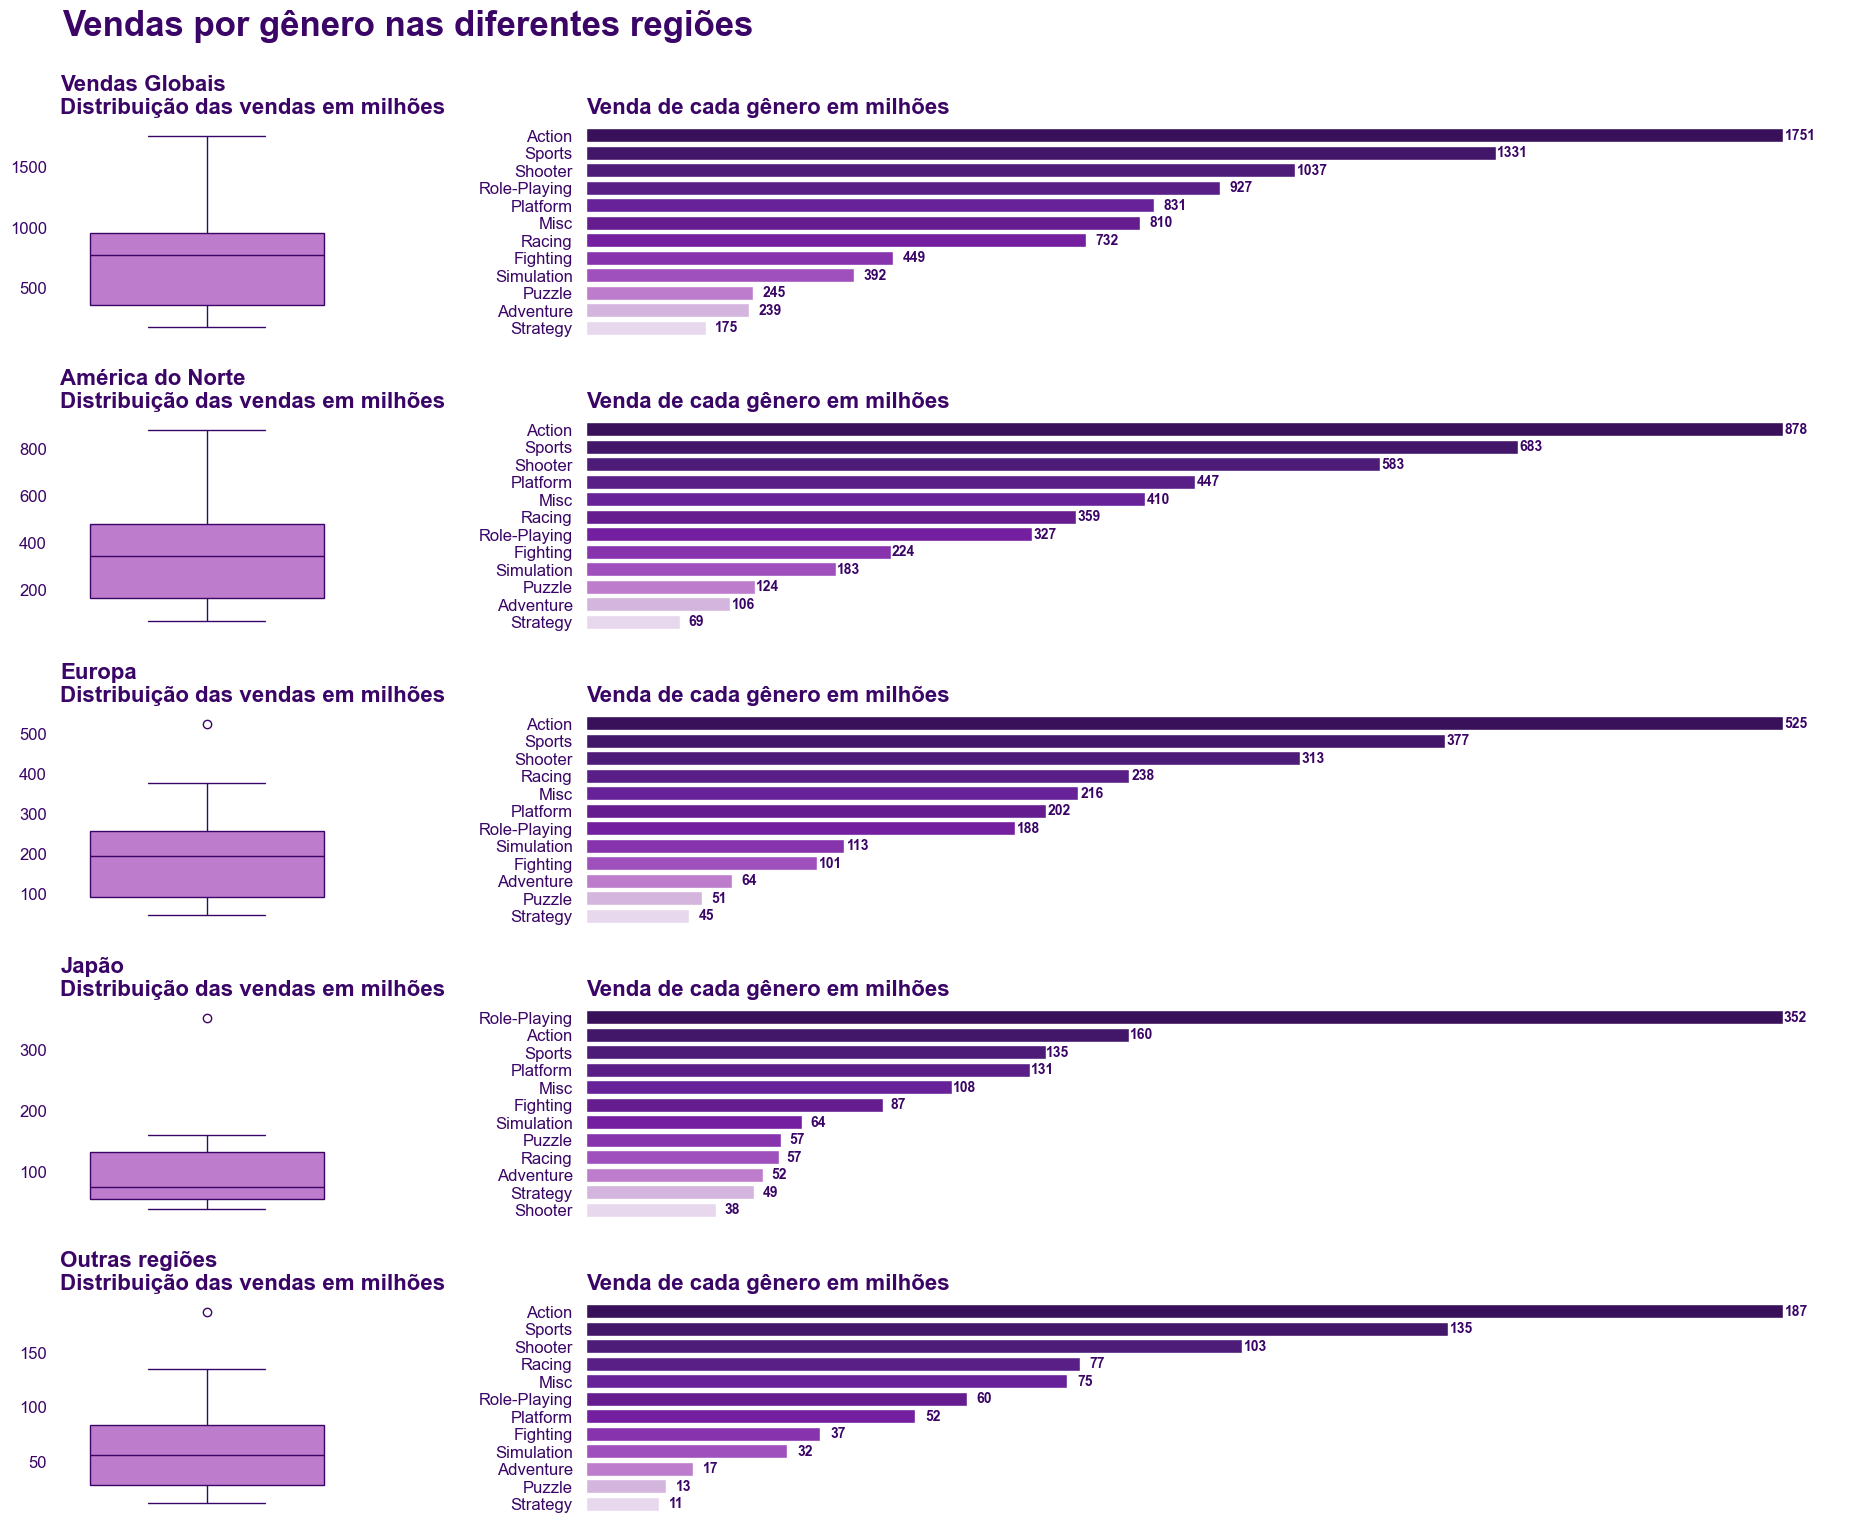

In [154]:
''' 
Construção gráfica para análise das vendas por gênero nas diferentes regiões
'''

fig, axs = plt.subplots(5,2, figsize = (23, 18), gridspec_kw={'width_ratios': [0.7, 3]})
fig.suptitle('Vendas por gênero nas diferentes regiões', fontsize = 25, ha = 'left', weight='bold', color = '#3A0566', y = 0.945, x = 0.126)

sns.set_theme(style = "white")

ax1 = boxplot_unico(df_vendas_genero[['Vendas_Globais']], 'Vendas_Globais', axs[0,0])
ax1.set_title('Vendas Globais\nDistribuição das vendas em milhões', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax2 = grafico_barra(df_vendas_genero[['Vendas_Globais']].sort_values(by = 'Vendas_Globais', ascending = False), 'Vendas_Globais', 48, axs[0,1])
ax2.set_title('\nVenda de cada gênero em milhões', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax3 = boxplot_unico(df_vendas_genero[['Vendas_AN']], 'Vendas_AN', axs[1,0])
ax3.set_title('América do Norte\nDistribuição das vendas em milhões', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax4 = grafico_barra(df_vendas_genero[['Vendas_AN']].sort_values(by = 'Vendas_AN', ascending = False), 'Vendas_AN', 18, axs[1,1])
ax4.set_title('\nVenda de cada gênero em milhões', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax5 = boxplot_unico(df_vendas_genero[['Vendas_EU']], 'Vendas_EU', axs[2,0])
ax5.set_title('Europa\nDistribuição das vendas em milhões', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax6 = grafico_barra(df_vendas_genero[['Vendas_EU']].sort_values(by = 'Vendas_EU', ascending = False), 'Vendas_EU', 11, axs[2,1])
ax6.set_title('\nVenda de cada gênero em milhões', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax7 = boxplot_unico(df_vendas_genero[['Vendas_JP']], 'Vendas_JP', axs[3,0])
ax7.set_title('Japão\nDistribuição das vendas em milhões', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax8 = grafico_barra(df_vendas_genero[['Vendas_JP']].sort_values(by = 'Vendas_JP', ascending = False), 'Vendas_JP', 7, axs[3,1])
ax8.set_title('\nVenda de cada gênero em milhões', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax9 = boxplot_unico(df_vendas_genero[['Vendas_Outras']], 'Vendas_Outras', axs[4,0])
ax9.set_title('Outras regiões\nDistribuição das vendas em milhões', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax10 = grafico_barra(df_vendas_genero[['Vendas_Outras']].sort_values(by = 'Vendas_Outras', ascending = False), 'Vendas_Outras', 4, axs[4,1])
ax10.set_title('\nVenda de cada gênero em milhões', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

plt.subplots_adjust(wspace=0.3, hspace=0.4)

Após observar os valores absolutos das vendas de jogos, é válido analisar em valores relativos para compreender melhor o impacto de cada gênero nas vendas totais de cada região e nas vendas globais.

In [25]:
df_vendas_genero_percentual = ((df_vendas_genero.div(df_vendas_genero.sum(axis=0), axis=1) * 100).round(2)).sort_values(by = "Vendas_Globais", ascending = False)

print('Percentual de venda dos gêneros em cada região, ordenado pela coluna "Vendas_Globais".')
df_vendas_genero_percentual

Percentual de venda dos gêneros em cada região, ordenado pela coluna "Vendas_Globais".


,Vendas_AN,Vendas_EU,Vendas_JP,Vendas_Outras,Vendas_Globais
Genero,,,,,
Action,19.98,21.57,12.39,23.49,19.63
Sports,15.56,15.48,10.49,16.92,14.92
Shooter,13.26,12.87,2.97,12.87,11.63
Role-Playing,7.45,7.73,27.29,7.47,10.40
Platform,10.18,8.28,10.13,6.47,9.32
Misc,9.34,8.87,8.35,9.44,9.08
Racing,8.18,9.79,4.39,9.69,8.21
Fighting,5.09,4.16,6.77,4.60,5.03
Simulation,4.17,4.66,4.93,3.95,4.40


In [26]:
df_vendas_genero_sem_global = df_vendas_genero.drop('Vendas_Globais', axis = 1)
df_vendas_genero_percentual_global = ((df_vendas_genero_sem_global.div(df_vendas_genero_sem_global.sum(axis=1), axis=0) * 100).round(2))

print('Impacto no mercado global da venda de cada gênero nas regiões, em percentual.')
df_vendas_genero_percentual_global

Impacto no mercado global da venda de cada gênero nas regiões, em percentual.


,Vendas_AN,Vendas_EU,Vendas_JP,Vendas_Outras
Genero,,,,
Action,50.16,30.00,9.14,10.71
Adventure,44.30,26.85,21.80,7.04
Fighting,49.80,22.57,19.46,8.17
Misc,50.69,26.69,13.32,9.31
Platform,53.79,24.26,15.74,6.21
Puzzle,50.64,20.78,23.45,5.13
Racing,49.12,32.58,7.75,10.56
Role-Playing,35.30,20.28,37.99,6.43
Shooter,56.19,30.21,3.69,9.90


<div style="background-color: #6a0dad; color: white; padding: 10px; border-radius: 5px;">
💡 Percepções
</div>

- Com já observado, o mercado da América do Norte gera o principal impacto no mercado global em praticamente todos os gêneros, mas vale destacar que o mercado europeu também é muito responsável pelos resultados mundiais.
    - O mercado japonês, como já analisado, segue comportamento muito próprio e, por isso, alguns resultados globais positivos são alavancados graças ao Japão.
        - O gênero Role_Playing no Japão além de ser o destaque positivo nessa região, é o único a superar o impacto do mercado norte americano, como pode ser visto na tabela de impactos percentuais.
- Em todas as regiões há um gênero que se destaca positivamente e seu impacto no mercado interno supera notavelmente os demais gêneros:
    - Japão: Role_Playing
    - Demais regiões: Action
- Por outro lado, os gêneros menos consumidos não apresentam o mesmo grau de disparidade, mantendo decaimento gradual de seus valores quando posto em ordem.
    - Tal comportamento pode ser observado nos gráficos de boxplot, visto que em todos a parte superior encontra-se distanciada das demais separatrizes, ao contrário da inferior.
- A ideia de sucesso de um jogo precisa considerar seu gênero e mercado foco, pois a performance dessa combinação pode trazer diferenças visíveis de resultados.

<p style="text-align: center;"><b>Com essa análise é possível responder algumas perguntas norteadoras, porém todas respondidas ao final da Análise bivariada das features.</b></p>


##### **Análise das tendências temporais de lançamento e venda**

Nessa seção, serão analisados os dados das vendas relativamente às datas de lançamento.<br>
Será apresentado:
- Histórico de vendas por região, a fim de compreender tendências de cada mercado.
- Composição das vendas globais ao longo do tempo.
- Frequência de cada gênero ao longo do tempo.
- Vendas por gênero ao longo do tempo nas diferentes regiões.

In [27]:
''' 
Preparação dos dados para essa análise específica.
Na seção 1. Preparações, na coluna Ano havia dados faltantes que foram preenchidos com zero. 
    Para essa etapa, esses dados serão descartados, pois não poderão ser interpretados corretamente. 
'''

df_venda_por_ano = df.groupby('Ano')[['Vendas_AN', 'Vendas_EU', 'Vendas_JP', 'Vendas_Outras', 'Vendas_Globais']].sum()
df_venda_por_ano = df_venda_por_ano.query("Ano > 0")

df_genero_por_ano = pd.crosstab(index = df['Ano'], columns= df['Genero']).query("Ano > 0")


regioes_vendas = ['Vendas_AN', 'Vendas_EU', 'Vendas_JP', 'Vendas_Outras']

pivot_tables = {} # Dicionário para armazenar os pivot tables

for coluna in regioes_vendas:
    df2 = df.query("Ano > 0")
    pivot_tables[coluna] = pd.pivot_table(df2, 
                                          index='Ano', 
                                          columns='Genero', 
                                          values=coluna, 
                                          aggfunc='sum', 
                                          fill_value=0)

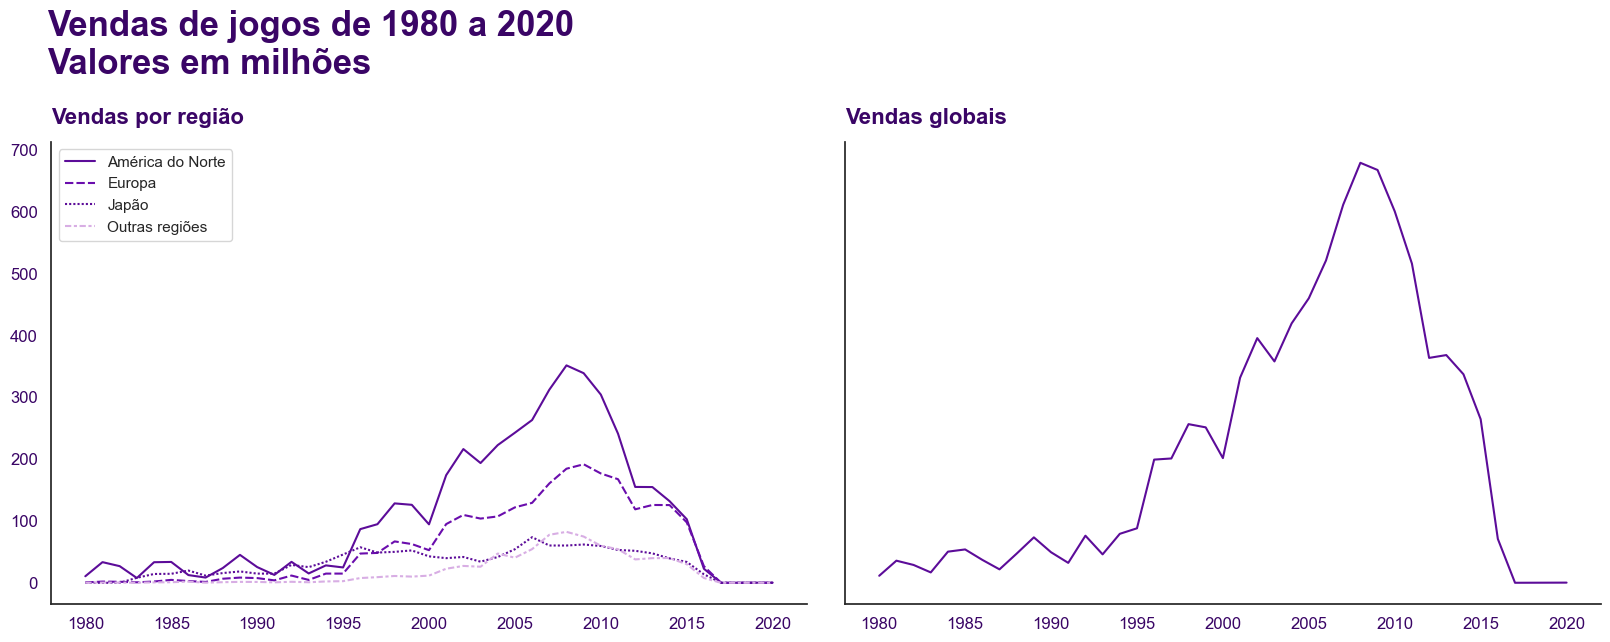

In [28]:
fig, ax = plt.subplots(1,2, figsize = (20,6), sharey = True)

fig.suptitle('Vendas de jogos de 1980 a 2020\nValores em milhões', fontsize = 25, ha = 'left', weight='bold', color = '#3A0566', y = 1.1, x = 0.123)
sns.set_theme(style = "white")

ax1 = grafico_linha(df_venda_por_ano[['Vendas_AN', 'Vendas_EU', 'Vendas_JP', 'Vendas_Outras']], True, ax[0])
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ['América do Norte', 'Europa', 'Japão', 'Outras regiões'], loc = 'upper left')
ax1.set_title('Vendas por região', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax2 = grafico_linha(df_venda_por_ano[['Vendas_Globais']], False, ax[1])
ax2.set_title('Vendas globais', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

plt.subplots_adjust(wspace=0.05)

A partir da década de 90, há crescimento estável na venda de todas as regiões e, consequentemente, nas vendas globais.<br>
Para complementar essas informações, serão comparados os valores máximos de duas décadas: anos 90 e 2000.<br>

In [29]:
lista_max_anos90 = []
lista_max_anos2000 = []

for r in df_venda_por_ano.columns:
    lista_max_anos90.append(df_venda_por_ano.query('2000 > Ano >= 1990')[r].max())
    lista_max_anos2000.append(df_venda_por_ano.query('2010 > Ano >= 2000')[r].max())

df_venda_por_ano_max = pd.DataFrame({
    "Venda_Max_Anos_90": lista_max_anos90,
    "Venda_Max_Anos_2000": lista_max_anos2000,
    "Porcentagem_Diferença": [round((v2000 - v90) / v90 * 100, 1) for v90, v2000 in zip(lista_max_anos90, lista_max_anos2000)]}, 
    index=['América do Norte', 'Europa', 'Japão', 'Outras regiões', 'Vendas globais'])

print('Comparação do maior valor de venda por região nas décadas de 90 e 2000.\nValor de venda em milhões.')
df_venda_por_ano_max

Comparação do maior valor de venda por região nas décadas de 90 e 2000.
Valor de venda em milhões.


,Venda_Max_Anos_90,Venda_Max_Anos_2000,Porcentagem_Diferença
América do Norte,128.36,351.44,173.8
Europa,66.90,191.59,186.4
Japão,57.44,73.73,28.4
Outras regiões,11.03,82.39,647.0
Vendas globais,256.47,678.90,164.7


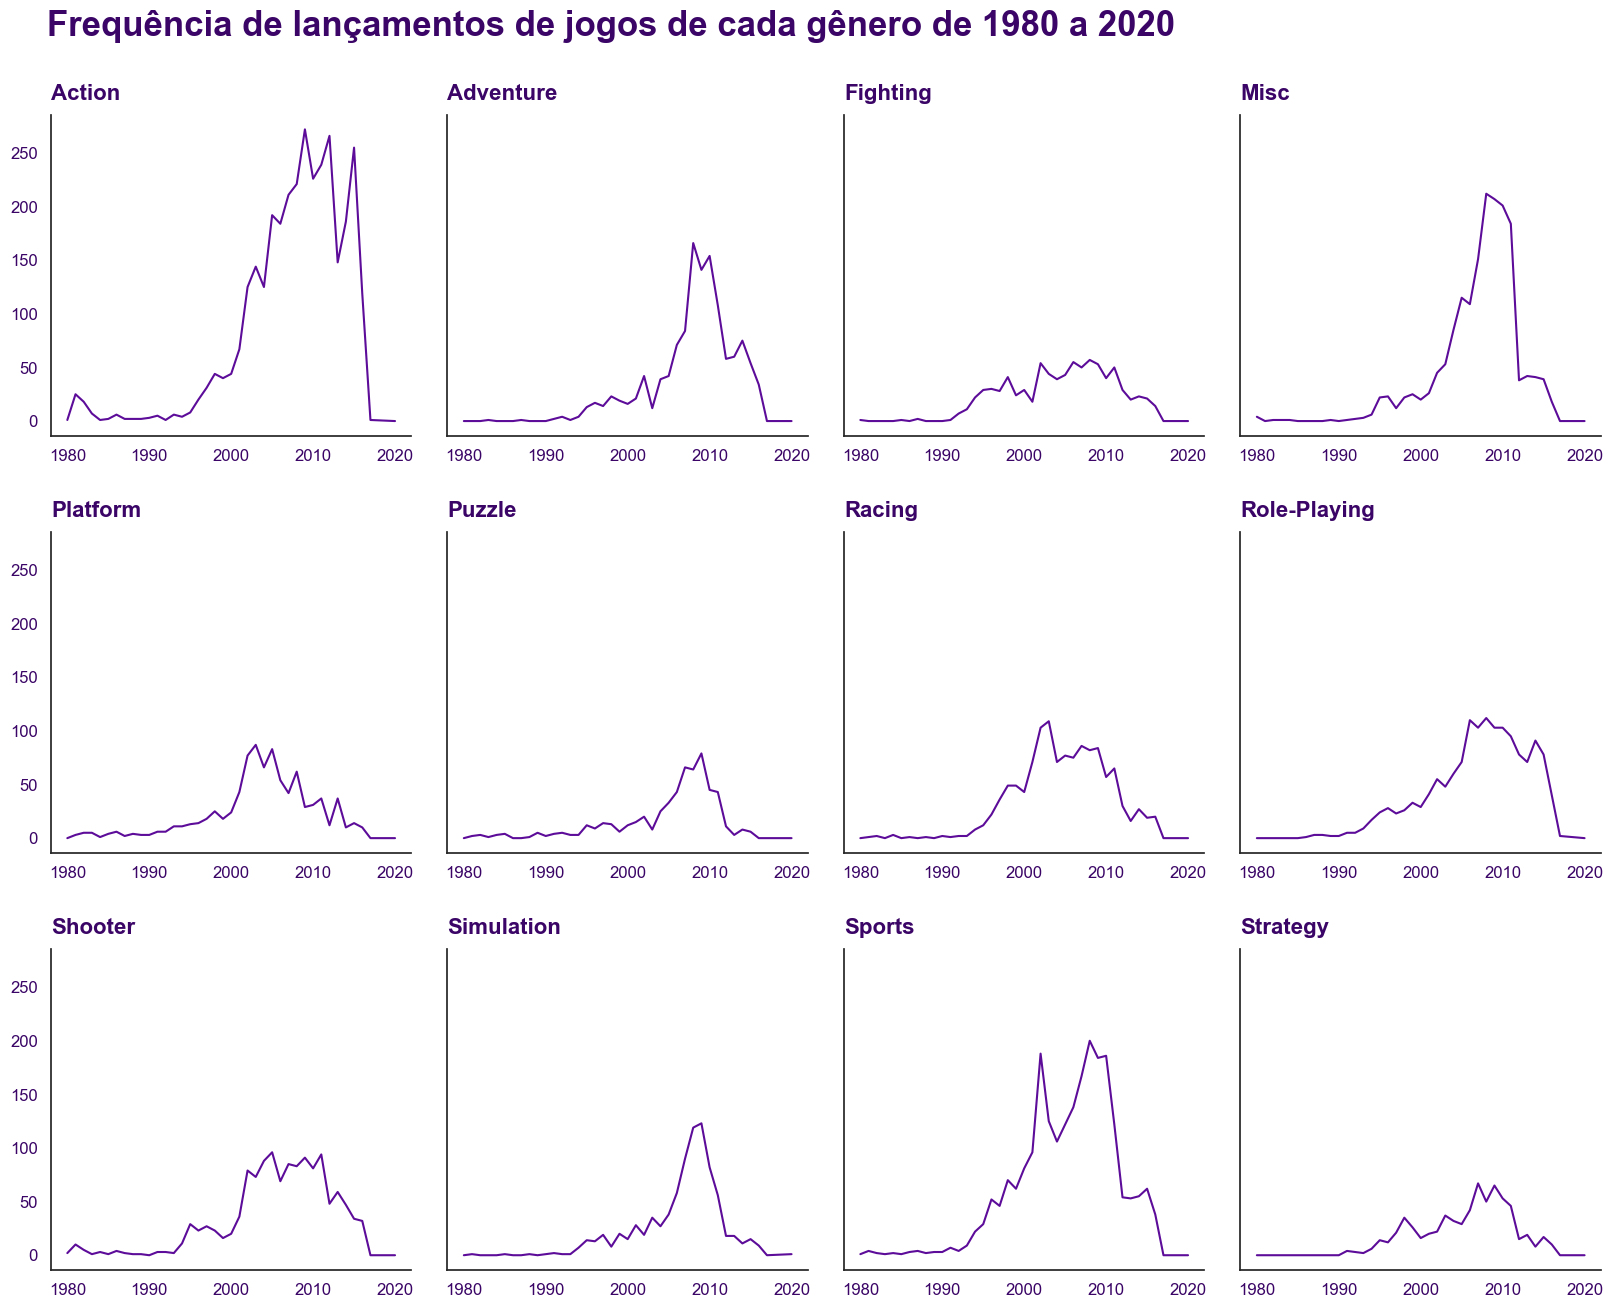

In [30]:
lista_generos = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']

fig, axs = plt.subplots(3, 4, figsize=(20, 15), sharey=True)

fig.suptitle('Frequência de lançamentos de jogos de cada gênero de 1980 a 2020', fontsize=25, ha='left', weight='bold', color='#3A0566', y=0.95, x=0.123)
sns.set_theme(style="white")

for i, genero in enumerate(lista_generos):
    # Determina a posição do subplot usando divisão inteira e resto
    row = i // 4  # Linha (divisão inteira)
    col = i % 4   # Coluna (resto da divisão)
    
    ax_i = grafico_linha(df_genero_por_ano[[genero]], False, axs[row, col])
    ax_i.set_title(genero, fontsize=16, ha='left', weight='bold', color='#3A0566', y=1.02, x=0)

plt.subplots_adjust(wspace= 0.1, hspace = 0.3)
plt.show()

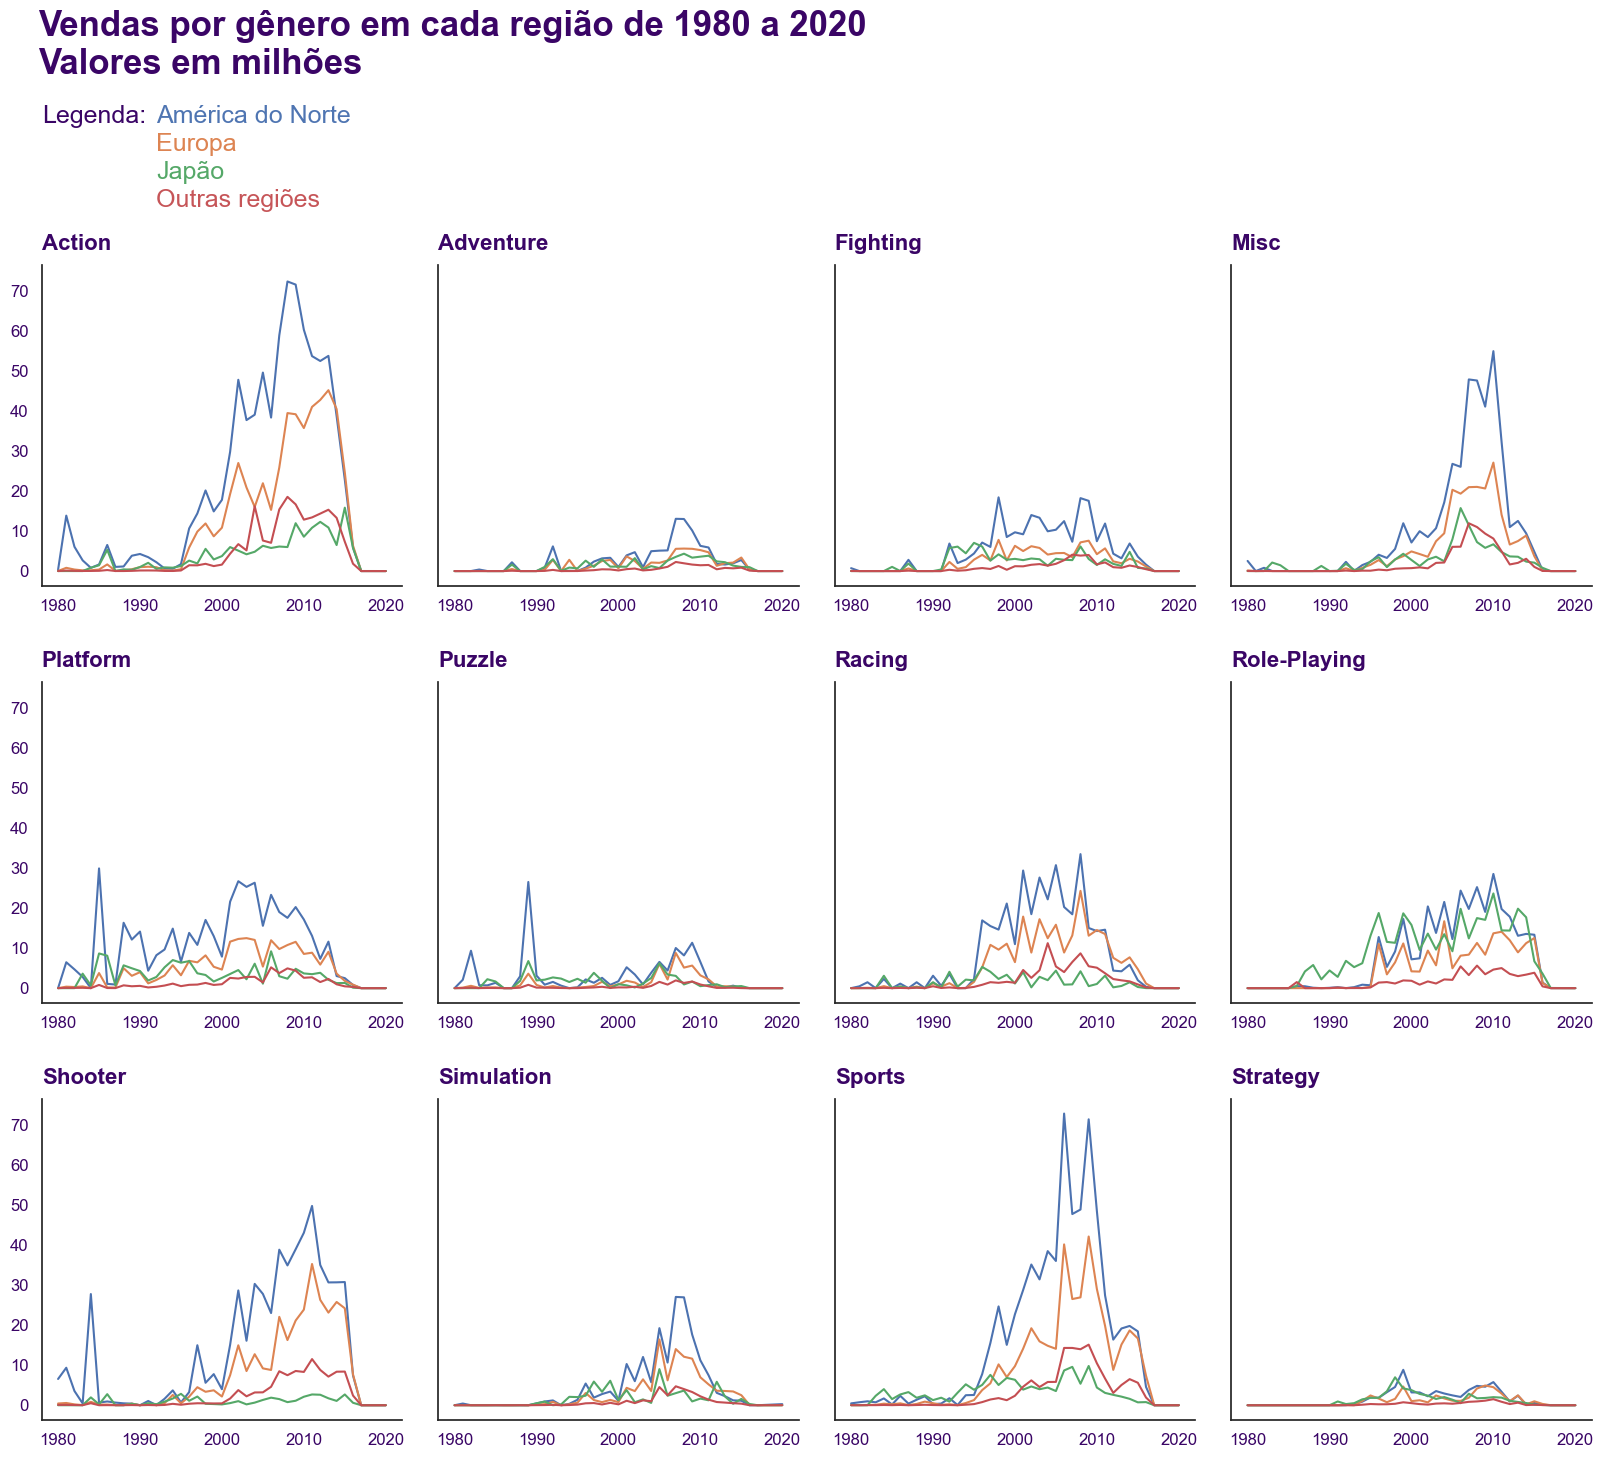

In [31]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15), sharey=True)

fig.suptitle('Vendas por gênero em cada região de 1980 a 2020\nValores em milhões', fontsize=25, ha='left', weight='bold', color='#3A0566', y= 1.05, x= 0.123)
sns.set_theme(style="white")

for i, genero in enumerate(lista_generos):
    row = i // 4 
    col = i % 4 

    for regiao in regioes_vendas:
        grafico_linha(pivot_tables[regiao][genero], False, axs[row, col])

    axs[row, col].set_title(genero, fontsize=16, ha='left', weight='bold', color='#3A0566', y=1.02, x=0)

''' 
Esse gráfico não seguiu o esquema de cores dos demais e a legenda não conseguiu demonstrar automaticamente as características das linhas.
Para contornar a situação, será estabelecida uma legenda manual e geral.
'''
axs[0,0].text(1978,112, 'Legenda:', fontsize=18, color = '#3A0566')

axs[0,0].text(1992,112, 'América do Norte', fontsize=18, color = '#4F75B2')

axs[0,0].text(1992,105, 'Europa', fontsize=18, color = '#DD8452')

axs[0,0].text(1992,98, 'Japão', fontsize=18, color = '#55A868')

axs[0,0].text(1992,91, 'Outras regiões', fontsize=18, color = '#C65558')

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

<div style="background-color: #6a0dad; color: white; padding: 10px; border-radius: 5px;">
💡 Percepções
</div>

- Como pode ser visto nos gráficos, todas as regiões apresentaram crescimento de vendas, em especial a partir da década de 1990.
	- Como já visto, América do Norte e Europa são as regiões que mais impactam nas vendas globais e agora pode-se observar esse comportamento historicamente.
	- Entre 1980 e 1990, esse panorama é razoavelmente diferente, mas vale destacar que a indústria estava em processo de se estabelecer, mesmo assim, as vendas norte americanas destacam-se das demais.
	- Vale ressaltar que o Japão é a região com vendas mais constantes ao longo do tempo, como pode ser visto no gráficos e reforçado no DataFrame, pois tem seu maior valor de vendas na década de 2000 que é apenas 28% maior que o pico de vendas na década de 90.
	- De forma geral, as Outras regiões apresentam pouco impacto na vendas globais, mas pode-se observar momentos de salto nas vendas, porém é um comportamento pontual e ainda pouco expressivo. 

- Assim como o número de vendas, a quantidade de jogos por gênero também aumentou consideravelmente após a década de 90.
	- Como já visto, os gêneros Action, Misc e Sports ocupam maior espaço entre os lançamentos.
	- Fighting e Strategy são os gêneros que, comparados aos demais, mais mantêm frequência equilibrada de novos jogos lançados, enquanto que os demais apresentam diversos picos de lançamento ao longo do tempo.

- Quanto as vendas por gênero, observa-se nos gráficos que América do Norte, Europa, Japão e Outras regiões é o padrão frequente mesmo observando por gênero.
	- No Japão, há nítido destaque positivo para o gênero Role-Playing.
	
- Como analisado nessa seção, a partir dos anos 90 há grande volume de venda e de novos títulos, porém alguns gêneros seguem comportamento diferente.
	- Adventure, Fighting, Puzzle e Strategy são os gêneros que mantêm maior constância de vendas e, de forma geral, abaixo dos demais.

##### **Análise do impacto da publisher nas vendas**
Nessa seção, será estudada a relevância das publishers no mercado de jogos.<br>
Para tal, será analisada a presença das publishers no lançamento dos diversos gêneros e o impacto de suas vendas.

In [310]:
''' 
Preparação dos dados para essa análise específica.
'''

df_venda_publisher = df.groupby('Publisher')[['Vendas_AN', 'Vendas_EU', 'Vendas_JP', 'Vendas_Outras', 'Vendas_Globais']].sum()

df_genero_publisher = pd.crosstab(index = df['Publisher'], columns= df['Genero'])

df_venda_publisher_genero = pd.pivot_table(df, 
                                index='Publisher', 
                                columns='Genero', 
                                values='Vendas_Globais', 
                                aggfunc='sum', 
                                fill_value=0)

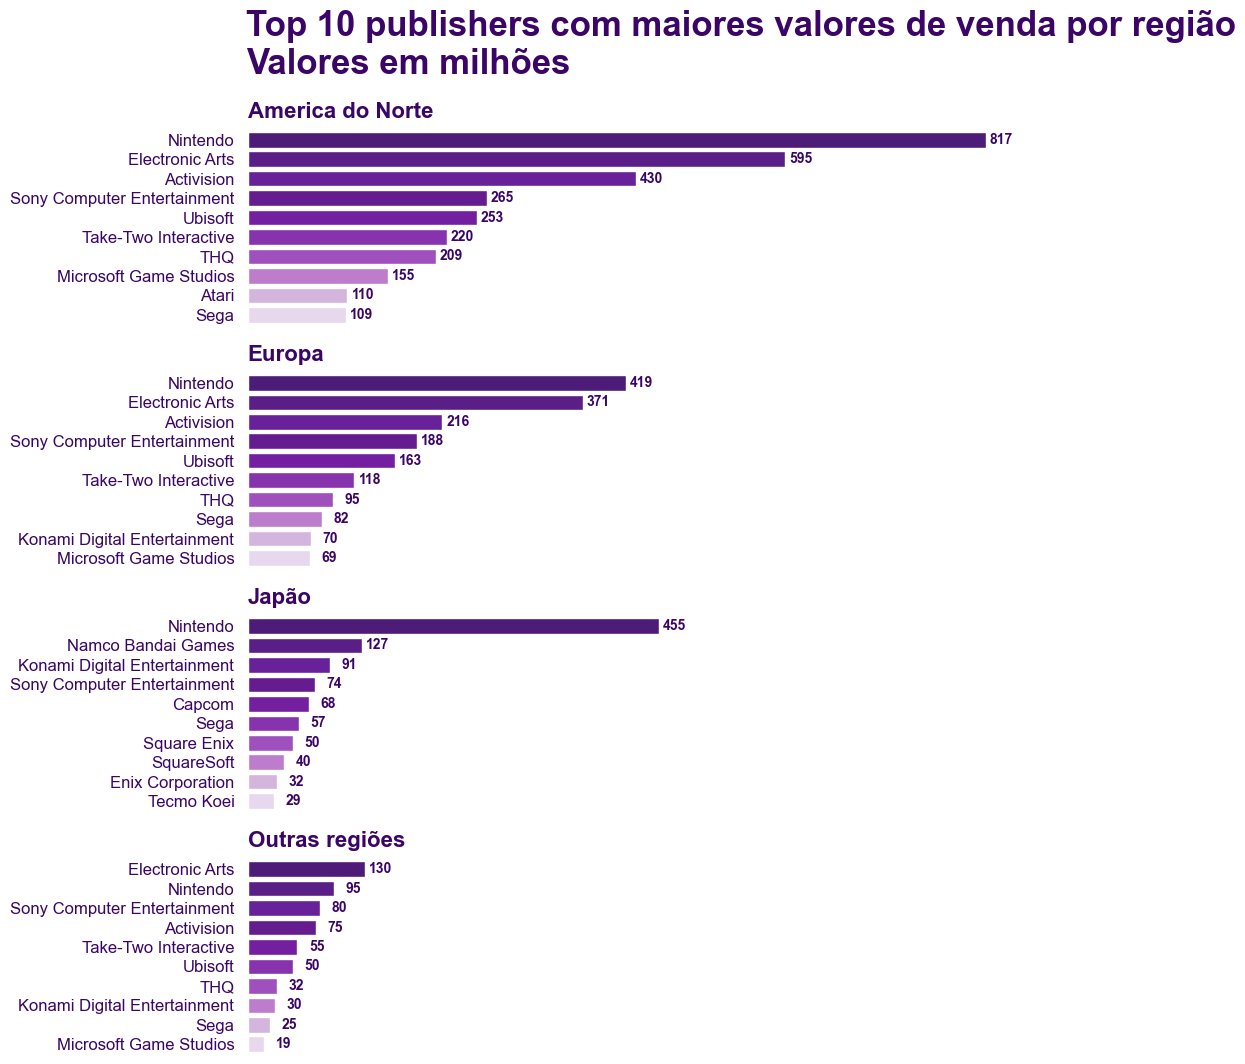

In [273]:
titulo = ['America do Norte', 'Europa', 'Japão', 'Outras regiões']

fig, ax = plt.subplots(4, figsize=(10, 12), sharex = True)

fig.suptitle('Top 10 publishers com maiores valores de venda por região\nValores em milhões', fontsize=25, ha='left', weight='bold', color='#3A0566', y=0.98, x=0.123)
sns.set_theme(style="white")

for i, r in enumerate(regioes_vendas):
    ax_i = grafico_barra(df_venda_publisher[[r]].sort_values(by = r, ascending = False).head(10), r, 30, ax[i])
    ax_i.set_title(titulo[i], fontsize=16, ha='left', weight='bold', color='#3A0566', y=1.02, x=0)

plt.subplots_adjust(wspace= 0.1, hspace = 0.25)
plt.show()

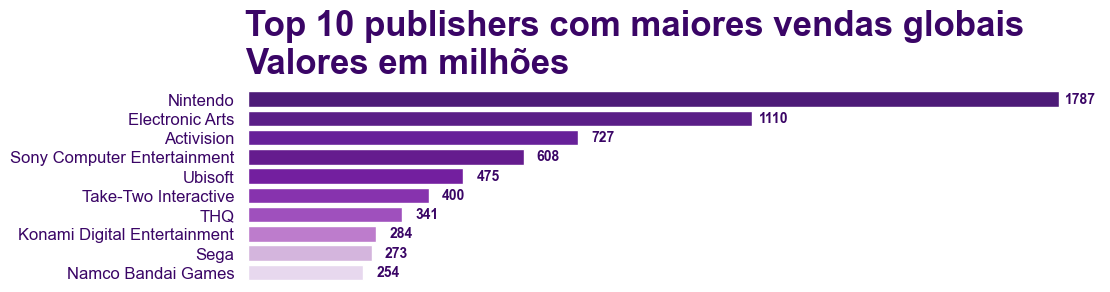

In [274]:
fig, ax = plt.subplots(1, figsize=(11, 2.5))

fig.suptitle('Top 10 publishers com maiores vendas globais\nValores em milhões', fontsize=25, ha='left', weight='bold', color='#3A0566', y=1.2, x=0.123)
sns.set_theme(style="white")

ax = grafico_barra(df_venda_publisher[["Vendas_Globais"]].sort_values(by = "Vendas_Globais", ascending = False).head(10), "Vendas_Globais", 80, ax)

plt.show()

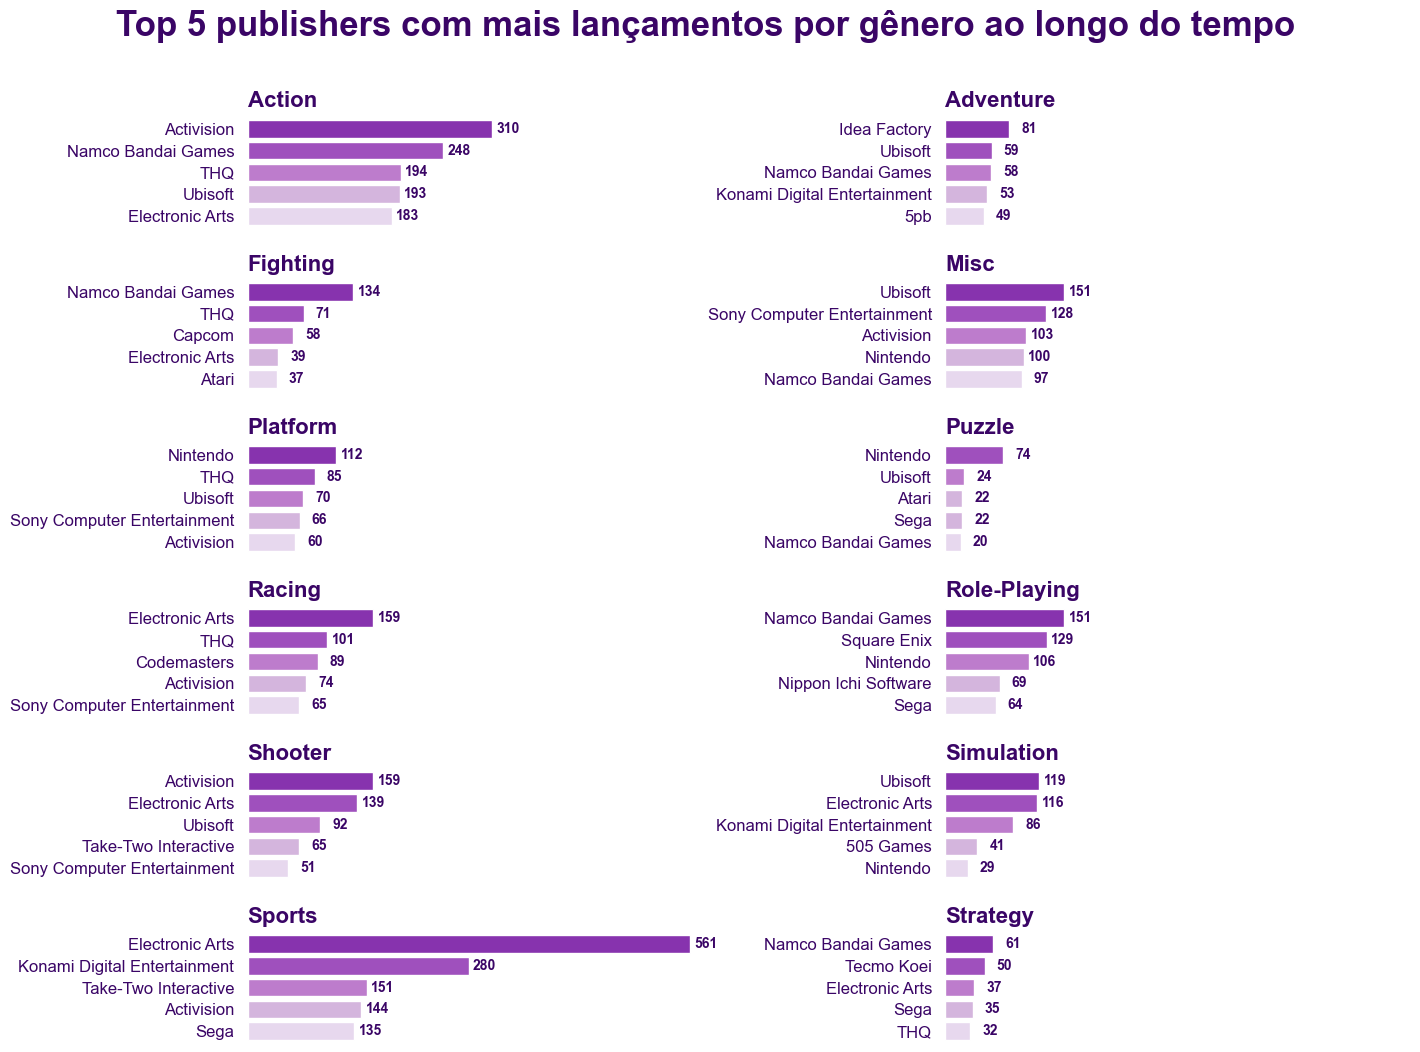

In [307]:
fig, axs = plt.subplots(6, 2, figsize=(15, 12), sharex = True)

fig.suptitle('Top 5 publishers com mais lançamentos por gênero ao longo do tempo', fontsize=25, ha='center', weight='bold', color='#3A0566', y=0.97, x=0.43)
sns.set_theme(style="white")

for i, g in enumerate(lista_generos):
    row = i // 2
    col = i % 2

    ax_i = grafico_barra(df_genero_publisher[[g]].sort_values(by = g, ascending= False).head(5), g, 35, axs[row, col])
    ax_i.set_title(lista_generos[i], fontsize=16, ha='left', weight='bold', color='#3A0566', y=1.02, x=0)

plt.subplots_adjust(wspace= 0.5, hspace = 0.5)
plt.show()

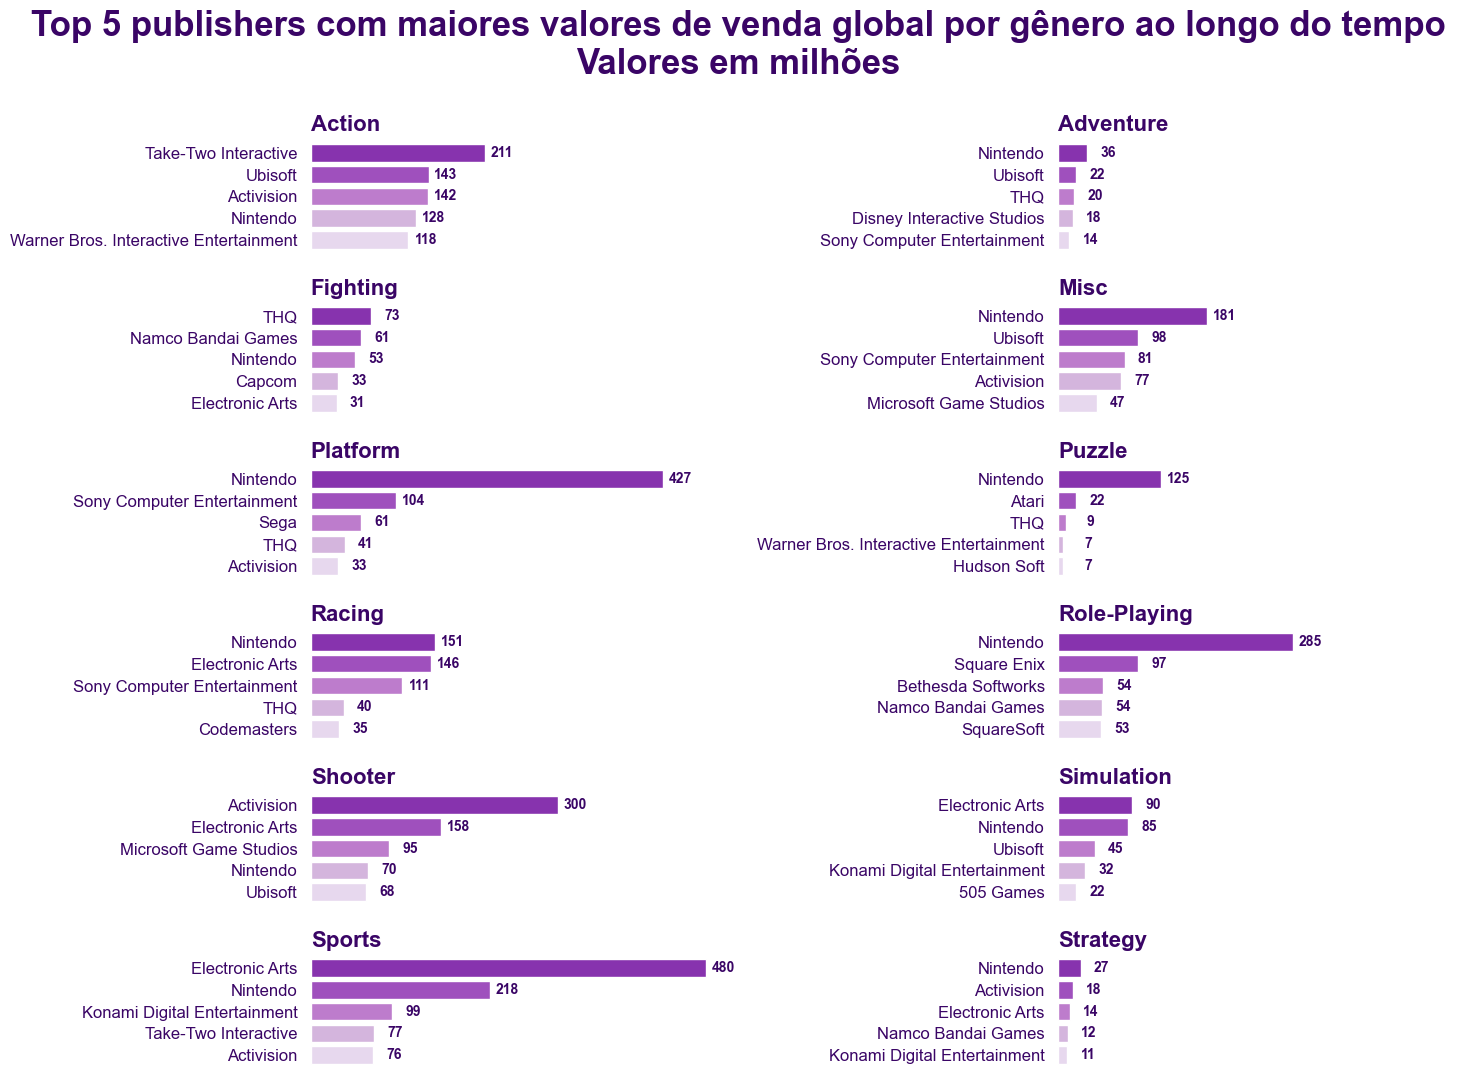

In [309]:
df_venda_publisher_genero[['Sports']].sort_values(by = "Sports", ascending = False).head(5)

df_venda_publisher_genero[['Action']]

fig, axs = plt.subplots(6, 2, figsize=(15, 12), sharex = True)

fig.suptitle('Top 5 publishers com maiores valores de venda global por gênero ao longo do tempo\nValores em milhões', fontsize=25, ha='center', weight='bold', color='#3A0566', y=0.99, x=0.41)
sns.set_theme(style="white")

for i, g in enumerate(lista_generos):
    row = i // 2
    col = i % 2

    ax_i = grafico_barra(df_venda_publisher_genero[[g]].sort_values(by = g, ascending = False).head(5), g, 35, axs[row, col])
    ax_i.set_title(lista_generos[i], fontsize=16, ha='left', weight='bold', color='#3A0566', y=1.02, x=0)

plt.subplots_adjust(wspace= 0.8, hspace = 0.5)
plt.show()

<div style="background-color: #6a0dad; color: white; padding: 10px; border-radius: 5px;">
💡 Percepções
</div>

- Apesar de existirem 578 publishers no DataSet estudado, como visto em **1.3 Adequações iniciais**, poucas apresentam real impacto no mercado.
	- Algumas dessas empresas costumam destacar-se na maioria das regiões, por exemplo: Nintendo, Eletronic Arts, Activision, Sony Computer Entertainment e Activision.
	- Com exceção das Outras regiões, nas demais, há sempre publishers com considerável vantagem de vendas.

- Em relação aos gêneros, também destacam-se algumas empresas, mas vale ressaltar nesse momento que em cada gênero costuma haver semelhança na quantidade de jogos lançados pelas diferentes publishers.
	- As exceções estão nos gêneros Puzzle e, principalmente, Sports, em que a empresa Eletronic Arts apresenta o dobro de jogos esportivos que a segunda colocada.


- Quanto às vendas por gênero, novamente há destaques positivos entre as publishers, porém o que mais se destaca é o fato de empresas que não aparecem no Top 5 com mais lançamentos ou aparecem em posições baixas, estarem entre as publishers com maiores valores de venda.
	- Como exemplo, destaca-se a Nintendo como terceira colocada em lançamentos no gênero Role_Playing, mas em primeiro em valor de venda no mesmo gênero.

### **2.3 EDA: Conclusões e resposta às questões norteadoras**

Aqui serão respondidas as perguntas norteadoras elencadas na seção **Problemas de negócio**.<br>
Além das respostas diretas às perguntas, serão feitos complementos na medida em que for necessário para aprofundamento da análise.

**Impacto do gênero nas vendas**

<div style="background-color: #C56FD9; color: white; padding: 10px; border-radius: 5px;">
    Quais gêneros de jogos têm o maior sucesso em termos de vendas globais?<br>
    Qual região (América do Norte, Europa, Japão, Outras) é mais forte em termos de vendas para diferentes gêneros?<br>
    Existem padrões regionais nas preferências de gêneros de jogos?<br>
</div>

- Os mercados apresentam diferenças sutis quanto aos gêneros com maiores vendas, com exceção do Japão que segue comportamento muito próprio.
    - Action ocupa posição de destaque em todas as regiões. 
        - Mesmo no Japão, onde a primeira posição é do Role_Playing, Action está em segundo lugar. 
- Portanto, Action mostra-se um gênero seguro para apostar bons resultados em vendas em todas as regiões, ainda que existam diferentes padrões de consumo.
- Gêneros menos favorecidos em vendas tentem a resultados semelhantes em todas as regiões, logo, com expectativas bem ajustadas, não há grande risco de rejeição em nenhuma região específica.

**Tendências temporais de lançamento e venda**
<div style="background-color: #C56FD9; color: white; padding: 10px; border-radius: 5px;">
    Como as vendas de jogos mudaram ao longo do tempo?<br>
    Existe uma correlação entre o ano de lançamento e o sucesso de vendas em diferentes regiões?
</div>

- Nitidamente o mercado de jogos ficou aquecido após as década de 90, apresentando significativa diferença na quantidade de lançamentos e no rendimento das vendas ao longo dos anos 2000.
- Ressalta-se que o conjunto de dados estudado pode apresentar poucos dados de 2010 para frente, logo, a baixa nos lançamentos e valores de vendas a partir desse ano pode sofrer mudanças com mais informações.

**Impacto da publisher nas vendas**
<div style="background-color: #C56FD9; color: white; padding: 10px; border-radius: 5px;">    
    Quais publishers tendem a ter jogos com maiores vendas globais e por região?<br>
    Quais publishers têm mais lançamentos por gênero?<br>
    Existe diferença significativa nas vendas entre publishers para jogos do mesmo gênero?
</div>

- Considerando a concorrência entre publishers, cada gênero é abarcado diferentemente pelas empresas, mas ainda assim há presença comum de certas publisher.
- Como apontado nas percepções acerca do impacto das publishers, há diferença significativa na presença dessas empresas quanto ao valor de venda alcançado pelos jogos, visto que algumas alcançam valores mais altos mesmo com menos lançamentos.
    - Assim, visando faturamento, vale selecionar a publisher pelos resultados alcançados mais do que pela facilidade em apoiar jogos de certo gênero.